****<center><b><i><font color="teal"> [Projet N°1 : Provisionnement Non Vie ]-[5DS2] </font><b><i></center>****
---
---

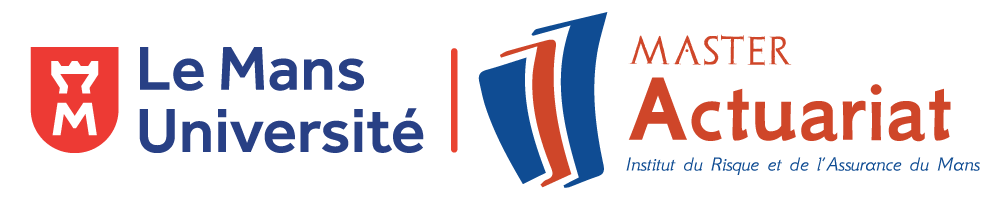

<h4><b><span style="font-family: Arial;color:blue"> Réalisé par : </span></b><h5>

- KHEMIRI Wissal --- Membre **[R-LADIES Tunis](https://www.facebook.com/RLadiesTunis)** <br>
- BAYOUEDH Wissal <br>
- HAMZA Mohamed <br>
- BOUATTOUR Mustapha <br>


<h4><b><span style="font-family: Arial;color:green"> Encadré par : </span></b><h5>
<h3><span style="font-family: Arial;color:gray">
- Mrs. CHAMMEM Irad <br>
- Mr. KSOURI Najed 
</span> 
</h3>

---

<h2><font color ="orange">Table of Contents :</font></h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        
<li><a href="#Section_0"> Introduction générale </a></li>
        <ul>
    <li>Motivation : Domaine Actuariat non-vie </li>
    <li>Notre cas : Provisionnement Non Vie</li>
    <li>Notre Objectif </li>
        </ul>
<li><a href="#Section_0"> Chargement des librairies nécessaires </a></li>
        
<br>
<hr>
<br>
<p><i><strong>Travail à faire :<strong></i><p>

<li><a href="#Section_1"> 1/ Charger les triangles de nombres, de règlement et de SAP </a></li>

<li><a href="#Section_2"> 2/ Analyser les triangles selon l'approche déja vue en classe (des graphiques sont souhaitables). </a></li>
        <ul>
    <li>Analyse statistiques</li>
    <li>Analyse des facteurs</li>
    <li>Analyse historique des couts moyens</li>
    <li>Analyse du taux de règlements</li>
        </ul>
        
<li><a href="#Section_3"> 3/ ===> Interpréter ces résultats </a> </li>
    
<li><a href="#Section_4"> 4/ Appliquer la méthode Chain Ladder sur les triangles cumulés de nombres, de règlements et de charges </a> </li>
    
<li><a href="#Section_5"> 5/ En déduire le nombre probable de tardifs et deux approches d'estimation des PSAP </a> </li>
    
<li><a href="#Section_6"> 6/ Appliquer les méthodes de Mack et de Bootstrap au triangle de Nombres et de règlements cumulés </a> </li>
    
<li><a href="#Section_7"> 7/ ===> Interpréter les résultats </a> </li>

<p><strong>En supposant que la première année de survenance est une année complète (ie tous les sinistres ont été réglé ) et que le S/P de cette année là est de 95% :</strong></p>
    
<li><a href="#Section_8"> 8/ Calculer le montant de la prime acquise </a> </li>

<p><strong>En prenant comme hypothèse une évolution annuelle de la prime acquise de 4% :</strong></p>

<li><a href="#Section_9"> 9/ Calculer les S/P de chaque année </a> </li>
    
<li><a href="#Section_10"> 10/ ===> Interpréter les résultats </a> </li>
        
<p>
<li><a href="#Section"> Références </a></li>
</div>

<hr>
---

<h2><font color ="pink"> Introduction générale : </font><h2>

---

    Afin de pouvoir couvrir leurs engagements, les assureurs doivent établir des provisions, notammentpour les sinistres survenus dont les coûts ne sont pas totalement réglés. Les techniques traditionnellespour quantifier ces provisions reposent sur l’agrégation de données individuelles en triangles de développementagrégés.Les provisions sont une part primordiale dans le bilan d’une société d’assurance. D’après uneétude Swiss Re (2008), la principale cause de non solvabilité des sociétés d’assurances américaines de1969 à 2002 était liée à des pertes causées par des provisions mal estimées. En France, l’évolution del’environnement réglementaire, de par les normes Solvabilité 2 et IFRS 17, impose un suivi plus précisdes risques, notamment par l’estimation des provisions.Dans ce projet nous allons appliquer des méthodes d’évaluation des provisions, pour obtenir lebest estimate de la provision pour sinistres à payer selon les approches étudiées en classe.

<h2><font color ="lime"> Chargement des librairies nécessaires : </font><h2>

---

In [1]:
library(lattice)

In [2]:
library("openxlsx")

In [4]:
library(ChainLadder)

---

---

---

<h2><font color ="fuchsia"> Feuil : triangles : </font><h2>

---

In [5]:
# 1/ chargement de data nécessaire (les triangles de nombres, de règlement et de SAP) :

In [6]:
### pour le triangle des ouvertures : 
# Un triangle d'ouverture représente le nombre des sinistre survenus en années i et ouverts dans l’année j.

In [7]:
ouvertures <- read.xlsx("ouvertures.xlsx", colNames = TRUE,  rowNames = TRUE)

In [8]:
ouvertures

,1,2,3,4,5,6,7,8,9,10
2005,1330,854,82,24,4,0,4,0,0,0
2006,1330,874,70,26,12,0,0,0,0,NA
2007,1786,1410,162,62,20,2,2,2,NA,NA
2008,2278,1556,168,46,8,2,4,NA,NA,NA
2009,2568,1582,178,54,8,2,NA,NA,NA,NA
2010,2380,1484,124,36,8,NA,NA,NA,NA,NA
2011,2424,1362,184,56,NA,NA,NA,NA,NA,NA
2012,2348,1606,228,NA,NA,NA,NA,NA,NA,NA
2013,2464,1454,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [9]:
tri_ouvertures <- as.triangle(as.matrix(ouvertures))

In [10]:
tri_ouvertures

,1,2,3,4,5,6,7,8,9,10
2005,1330,854,82,24,4,0,4,0,0,0
2006,1330,874,70,26,12,0,0,0,0,NA
2007,1786,1410,162,62,20,2,2,2,NA,NA
2008,2278,1556,168,46,8,2,4,NA,NA,NA
2009,2568,1582,178,54,8,2,NA,NA,NA,NA
2010,2380,1484,124,36,8,NA,NA,NA,NA,NA
2011,2424,1362,184,56,NA,NA,NA,NA,NA,NA
2012,2348,1606,228,NA,NA,NA,NA,NA,NA,NA
2013,2464,1454,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [11]:
#?plot.triangle

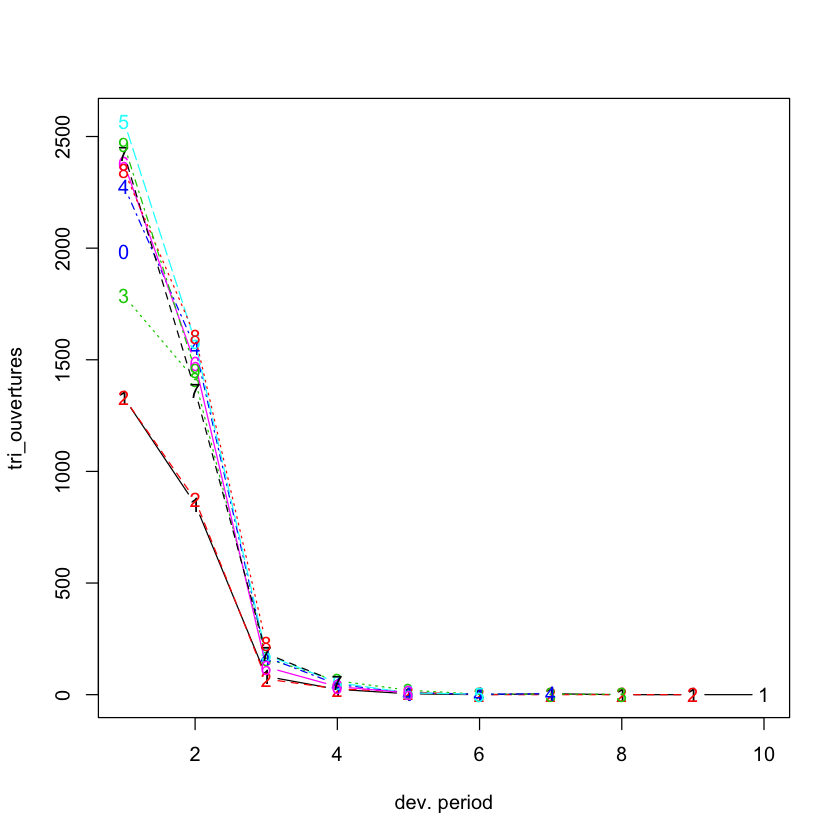

In [12]:
plot(tri_ouvertures)

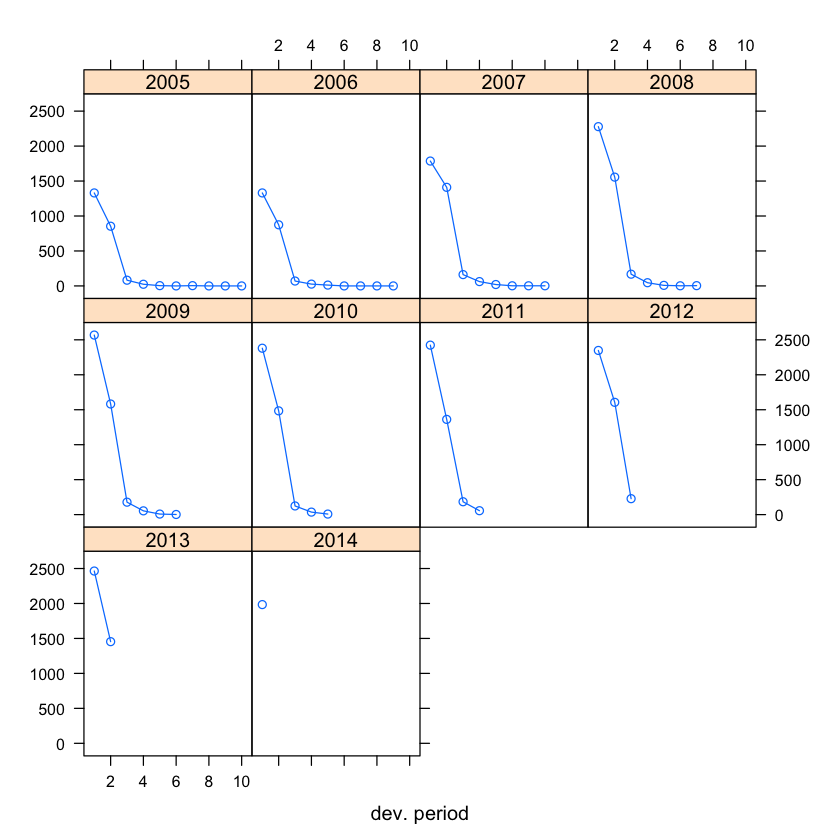

In [13]:
plot(tri_ouvertures, lattice=TRUE)

---

In [14]:
### pour le triangle de réglement :
# Un Tringle de réglement représente les règlements des sinistre survenus en années i et réglés dans l’année j.

In [15]:
reglements <- read.xlsx("reglements.xlsx", colNames = TRUE,  rowNames = TRUE)

In [16]:
reglements

,1,2,3,4,5,6,7,8,9,10
2005,1171960,6604454,7247851,4476007,2140354,1315501,1500735,495272,264542,91392
2006,803251,3936933,7216462,5498608,2076533,2775363,749770,348477,327902,NA
2007,360205,3305002,7954925,5121387,3134808,1652229,1525124,688869,NA,NA
2008,639281,5118946,8945907,8464976,4141026,1430473,695916,NA,NA,NA
2009,1345321,7380489,13706351,8043920,3263113,1278109,NA,NA,NA,NA
2010,1613627,10069551,13520486,6380116,3886241,NA,NA,NA,NA,NA
2011,1484187,9634063,10671624,5886916,NA,NA,NA,NA,NA,NA
2012,2907655,10322393,8763518,NA,NA,NA,NA,NA,NA,NA
2013,3465669,9640431,NA,NA,NA,NA,NA,NA,NA,NA
2014,3619805,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [17]:
tri_reglements <- as.triangle(as.matrix(reglements))

In [18]:
tri_reglements

,1,2,3,4,5,6,7,8,9,10
2005,1171960,6604454,7247851,4476007,2140354,1315501,1500735,495272,264542,91392
2006,803251,3936933,7216462,5498608,2076533,2775363,749770,348477,327902,NA
2007,360205,3305002,7954925,5121387,3134808,1652229,1525124,688869,NA,NA
2008,639281,5118946,8945907,8464976,4141026,1430473,695916,NA,NA,NA
2009,1345321,7380489,13706351,8043920,3263113,1278109,NA,NA,NA,NA
2010,1613627,10069551,13520486,6380116,3886241,NA,NA,NA,NA,NA
2011,1484187,9634063,10671624,5886916,NA,NA,NA,NA,NA,NA
2012,2907655,10322393,8763518,NA,NA,NA,NA,NA,NA,NA
2013,3465669,9640431,NA,NA,NA,NA,NA,NA,NA,NA
2014,3619805,NA,NA,NA,NA,NA,NA,NA,NA,NA


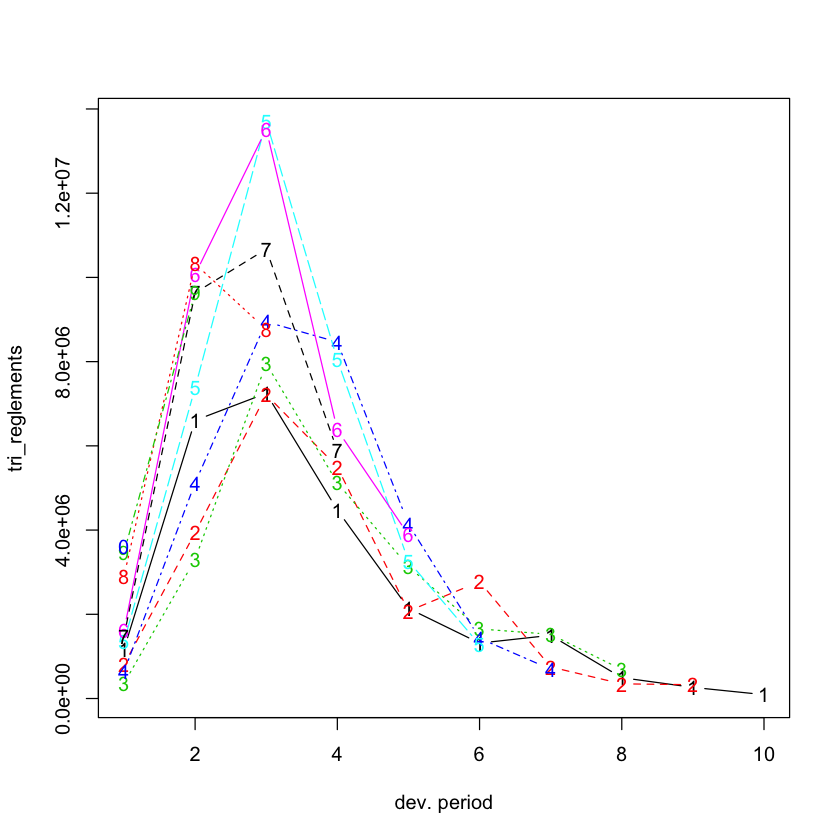

In [19]:
plot(tri_reglements)

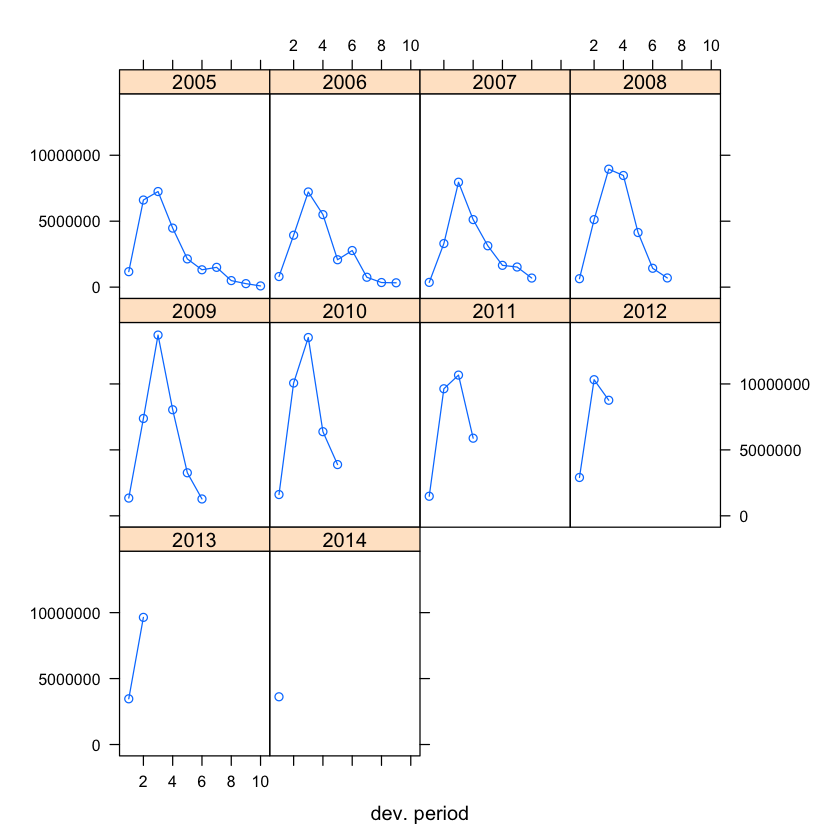

In [20]:
plot(tri_reglements, lattice=TRUE)

---

In [21]:
### pour le triangle de provisions SAP :
# Un Tringle de provision SAP représente les provisions constituées pour couvrer de la charge à le montant exact incertain en années i et réglés dans l’année j.

In [22]:
provisions_SAP <- read.xlsx("provisions_SAP.xlsx", colNames = TRUE,  rowNames = TRUE)

In [23]:
provisions_SAP

,1,2,3,4,5,6,7,8,9,10
2005,23874002,23178206,18026468,11849698,9111046,6843142,4701790,3444456,2515838,2444540
2006,22085614,28058028,20672062,14678202,11230620,6517368,5117986,3935008,3139640,NA
2007,23118624,31740206,25609466,19754562,14177400,9873226,7208260,6141802,NA,NA
2008,28120022,36959930,29915414,20552368,13302814,10257336,8593504,NA,NA,NA
2009,32313102,47994544,35683828,25996196,18725502,15631064,NA,NA,NA,NA
2010,38381884,44601906,30802126,21398782,15144404,NA,NA,NA,NA,NA
2011,37425888,44453312,31268938,22448622,NA,NA,NA,NA,NA,NA
2012,48681726,51996108,43854842,NA,NA,NA,NA,NA,NA,NA
2013,44363544,51431152,NA,NA,NA,NA,NA,NA,NA,NA
2014,39611624,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [24]:
tri_provisions_SAP <- as.triangle(as.matrix(provisions_SAP))

In [25]:
tri_provisions_SAP

,1,2,3,4,5,6,7,8,9,10
2005,23874002,23178206,18026468,11849698,9111046,6843142,4701790,3444456,2515838,2444540
2006,22085614,28058028,20672062,14678202,11230620,6517368,5117986,3935008,3139640,NA
2007,23118624,31740206,25609466,19754562,14177400,9873226,7208260,6141802,NA,NA
2008,28120022,36959930,29915414,20552368,13302814,10257336,8593504,NA,NA,NA
2009,32313102,47994544,35683828,25996196,18725502,15631064,NA,NA,NA,NA
2010,38381884,44601906,30802126,21398782,15144404,NA,NA,NA,NA,NA
2011,37425888,44453312,31268938,22448622,NA,NA,NA,NA,NA,NA
2012,48681726,51996108,43854842,NA,NA,NA,NA,NA,NA,NA
2013,44363544,51431152,NA,NA,NA,NA,NA,NA,NA,NA
2014,39611624,NA,NA,NA,NA,NA,NA,NA,NA,NA


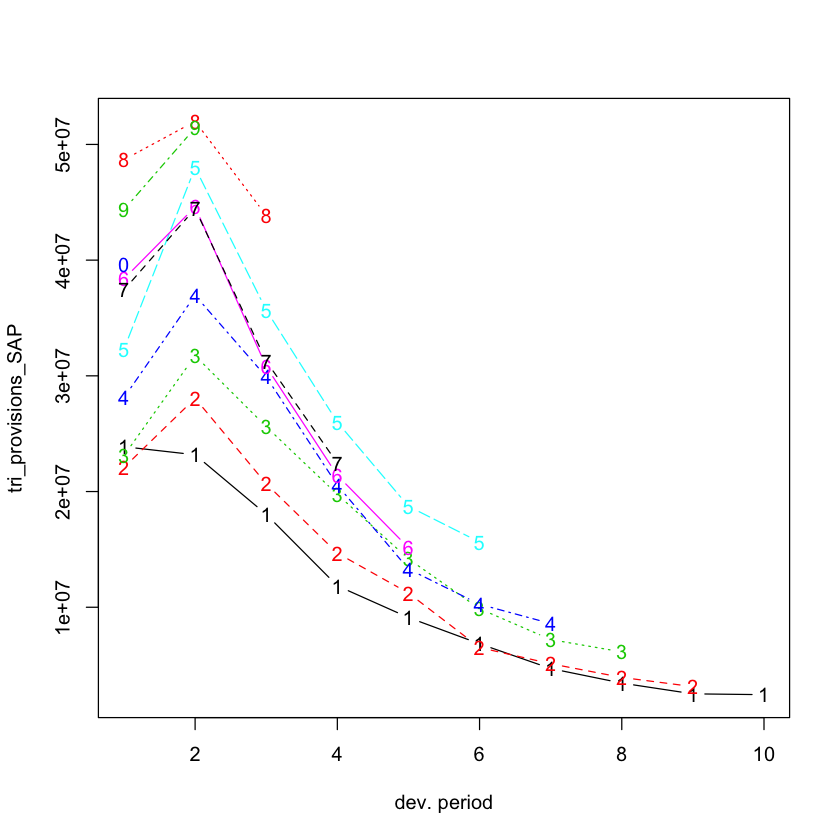

In [26]:
plot(tri_provisions_SAP)

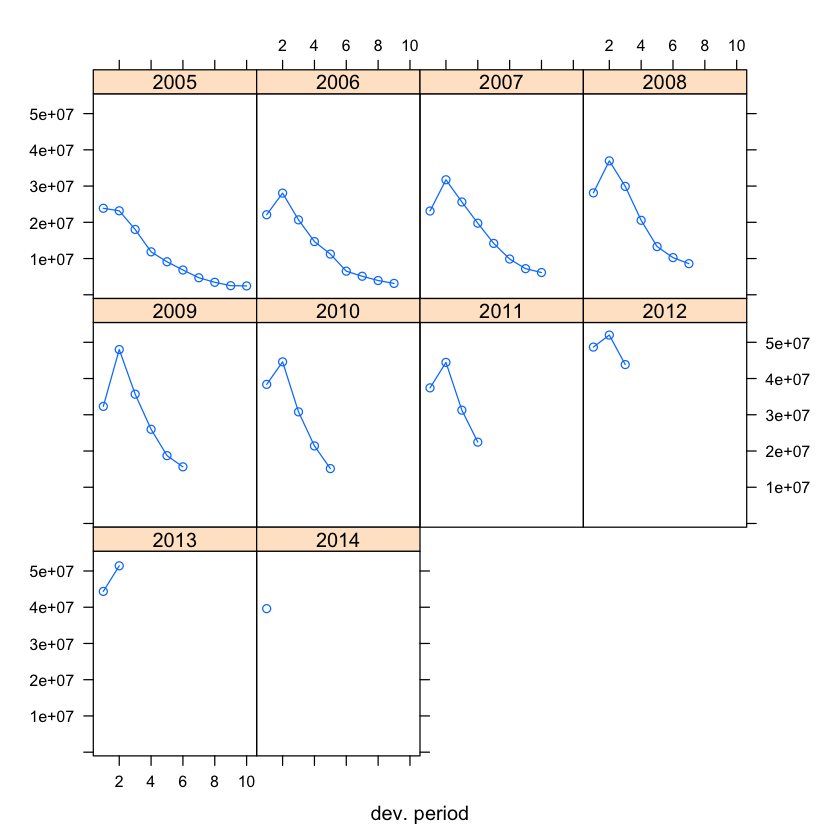

In [27]:
plot(tri_provisions_SAP, lattice=TRUE)

---

---

---

<h2><font color ="fuchsia"> Feuil : Analyse des triangles : </font><h2>

---

In [28]:
# 2/ Analyse des triangles selon l'approche vue en classe (avec les graphiques souhaitables).

In [29]:
# c'est le fait de transformer les triangles incrémentaux en des triangles cumulatifs :

In [30]:
### pour le triangle des ouvertures cumulés :
# On doit utiliser la formule des valeurs cumulés suivante :

$$ Oc_{i,j}= \sum_{i=0,j=0}^{K} (O_{ij}) $$

---
avec : 
$$Oc_{i,j}:$$ le nombre cumulés des sinistres survenus l’année i jusqu’à l’année j de développement des sinistres 
$$O_{ij}:$$ le nombre des sinistres survenus l’année i et réglés ou ouverts l’année j.

In [31]:
ouvertures.cum <- incr2cum(tri_ouvertures)

In [32]:
ouvertures.cum

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184,2266,2290,2294,2294,2298,2298,2298,2298
2006,1330,2204,2274,2300,2312,2312,2312,2312,2312,NA
2007,1786,3196,3358,3420,3440,3442,3444,3446,NA,NA
2008,2278,3834,4002,4048,4056,4058,4062,NA,NA,NA
2009,2568,4150,4328,4382,4390,4392,NA,NA,NA,NA
2010,2380,3864,3988,4024,4032,NA,NA,NA,NA,NA
2011,2424,3786,3970,4026,NA,NA,NA,NA,NA,NA
2012,2348,3954,4182,NA,NA,NA,NA,NA,NA,NA
2013,2464,3918,NA,NA,NA,NA,NA,NA,NA,NA
2014,1984,NA,NA,NA,NA,NA,NA,NA,NA,NA


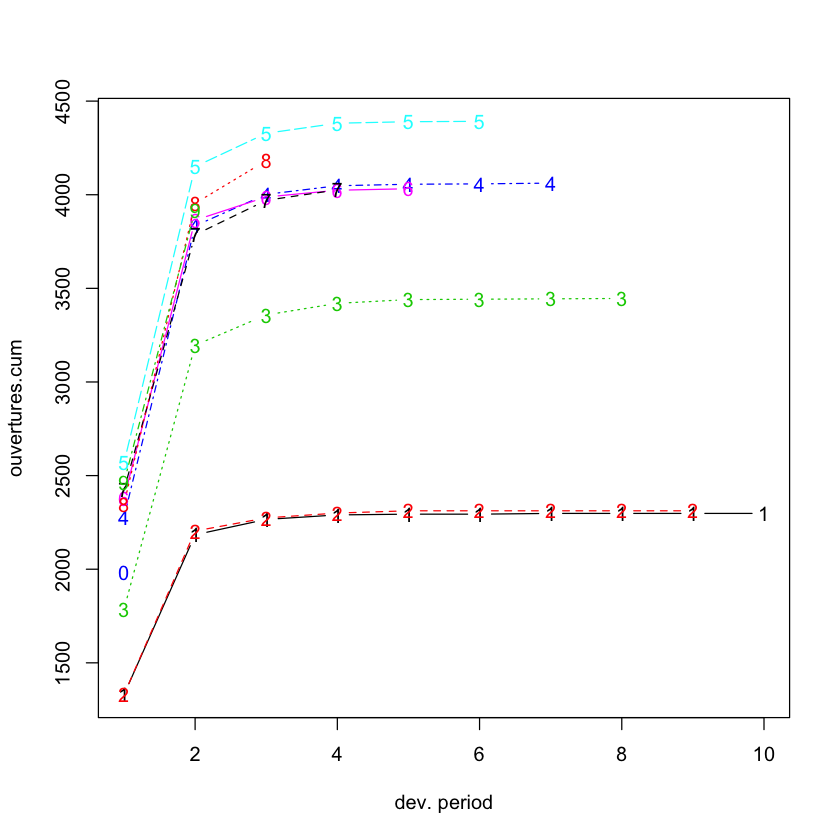

In [33]:
plot(ouvertures.cum)

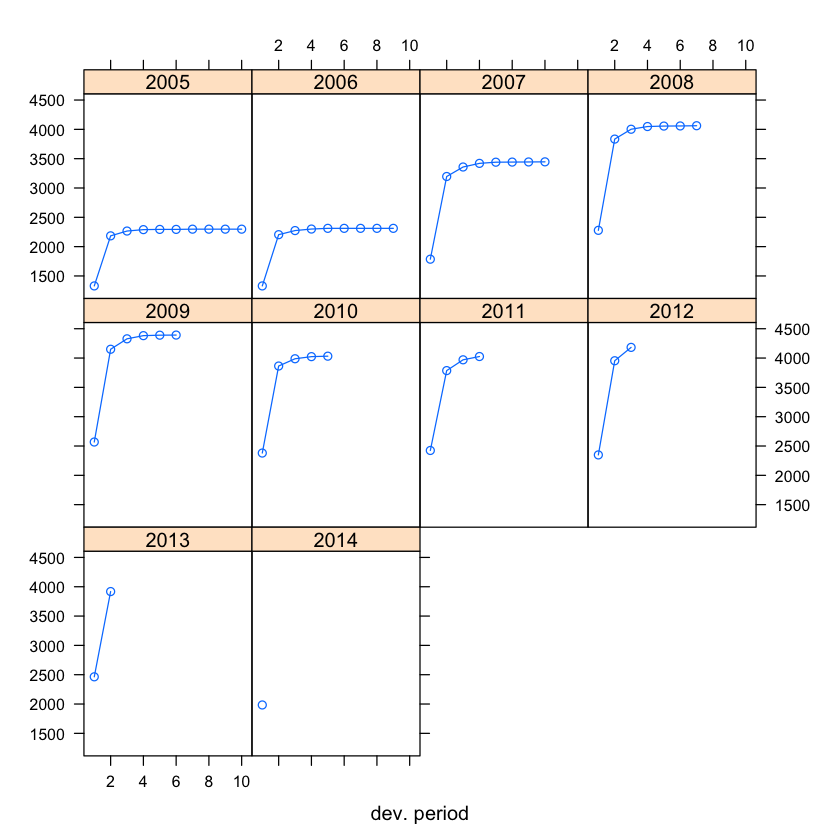

In [34]:
plot(ouvertures.cum, lattice=TRUE)

- Ce graphe montre le nombre de sinistres cumulés par année de survenance 
- On constate la présence d’une grande évolution de nombres des sinistres au cours des années surtout entre les années 2005-2008 .
- Aussi, il y a une irrégularité dans la gestion des sinistres expliquée par l’augmentation brutale des sinistres au cours ces années des cadences de nombre de sinistres selon les années de survenances. Cela implique des cadences de nombre de sinistres selon les années de survenances. 

In [35]:
# triangle des cadences :

In [36]:
# On doit utiliser la formule de calcul des cadences suivante :

$$ Oc_{i,j}= \sum_{i=0,j=0}^{K} (O_{ij}) $$

---
avec : 
$$Oc_{i,j}:$$ Les règlements cumulés des sinistres survenus l’année i jusqu’à l’année j de développement des sinistres 
$$O_{ij}:$$ Les règlements survenus l’année i et réglés ou ouverts l’année j.

In [37]:
ouvertures.cad = ouvertures.cum

In [38]:
#ouvertures.cad

In [39]:
n_row = nrow(ouvertures.cad)
for( i in 1: 10){ #ligne
    ouvertures.cad[i,1]=NA
    
    for( j in 2:n_row) { #colonne
    ouvertures.cad[i,j] = round((ouvertures.cum[i,j] / ouvertures.cum[i,j-1])*100,2)
    }
    n_row = n_row -1
    }


ERROR: Error in ouvertures.cad[i, j] <- round((ouvertures.cum[i, j]/ouvertures.cum[i, : replacement has length zero


In [40]:
ouvertures.cad

,1,2,3,4,5,6,7,8,9,10
2005,NA,164.21,103.75,101.06,100.17,100.00,100.17,100.00,100,100
2006,NA,165.71,103.18,101.14,100.52,100.00,100.00,100.00,100,NA
2007,NA,178.95,105.07,101.85,100.58,100.06,100.06,100.06,NA,NA
2008,NA,168.31,104.38,101.15,100.20,100.05,100.10,NA,NA,NA
2009,NA,161.60,104.29,101.25,100.18,100.05,NA,NA,NA,NA
2010,NA,162.35,103.21,100.90,100.20,NA,NA,NA,NA,NA
2011,NA,156.19,104.86,101.41,NA,NA,NA,NA,NA,NA
2012,NA,168.40,105.77,NA,NA,NA,NA,NA,NA,NA
2013,NA,159.01,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- On remarque une forte irrégularité pendant la première année (au déla de 150%), ainsi une irrégularité légère pendant les 2 année suivantes et les restes années de 
développements prennent des valeurs au alentour de 100% (ce qui est expliqué par la graphe de triangle des ouverture cumulés)
- Cette Irrégularité présente des valeurs abbérante/atypique surtout pour l''années 2007 de la première année de développement dont la valeur est 178.95% .

In [41]:
# Analyse des cadences :

In [42]:
#Ecartype d'une population
#https://www.dummies.com/education/math/statistics/standard-deviation-r/
sd.p=function(x){sd(x)*sqrt((length(x)-1)/length(x))}

In [43]:
Moy=c()
EcarT=c()
Coef_Var=c()
Min=c()
Max=c()
n_row = nrow(ouvertures.cad)
for(i in 1:10)
{
    
    Moy[i-1]=c(mean(ouvertures.cad[,i][1:(11-i)]))
    #EcarT[i-1]=c(sd(ouvertures.cad[,i][1:(11-i)]))
    EcarT[i-1]=c(sd.p(ouvertures.cad[,i][1:(11-i)]))
    EcarT[9]=0
    Coef_Var[i-1]=c((EcarT[i-1]/Moy[i-1])*100 )
    Min[i-1]=c( (Moy[i-1]-EcarT[i-1]) )
    Max[i-1]=c((EcarT[i-1]+Moy[i-1]) )
    
}



In [44]:
Factor <- sprintf("%d", 1:9) 

In [45]:
Moyenne=(Moy)
Ecartype=(EcarT)
Coef_Variation=(Coef_Var)
Minimum=(Min)
Maximun=(Max)

In [46]:
Analyse_cad_ouvertures = t(data.frame(Factor ,Moyenne,Ecartype,Coef_Variation,Minimum,Maximun))

In [47]:
Analyse_cad_ouvertures

Factor,1,2,3,4,5,6,7,8,9
Moyenne,164.9700,104.3137,101.2514,100.3083,100.0320,100.0825,100.0200,100.0000,100.0000
Ecartype,6.23892263,0.85274465,0.28442567,0.17208686,0.02638181,0.06179604,0.02828427,0.00000000,0.00000000
Coef_Variation,3.78185284,0.81748058,0.28091027,0.17155789,0.02637337,0.06174510,0.02827862,0.00000000,0.00000000
Minimum,158.73108,103.46101,100.96700,100.13625,100.00562,100.02070,99.99172,100.00000,100.00000
Maximun,171.2089,105.1665,101.5359,100.4804,100.0584,100.1443,100.0483,100.0000,100.0000


- l'analyse descriptive nous amène à remarquer l'irrégularité pour la premiere année (la plus remarquable) avec une moyenne de 164.97% et de Ecartype de 6.23% , par contre la présence d'une stabilité pour le restes des années (sauf la deuxième et la troisième).
- La coefficient de variation est très volatiles pour la première année(3.78%), et légèrement volatile pour la deuxième et la troisième année de développement (respectivement de 0.81% et 0.28%).
- Les irrégularités sont expliquées par soit la mauvaise gestion des sinistres, soit le retard d’ouvertures des sinistres, soit le retard de couvrements des sinistres.


---

In [48]:
### pour le triangle des réglements :

In [49]:
reglements.cum <- incr2cum(tri_reglements)

In [50]:
reglements.cum

,1,2,3,4,5,6,7,8,9,10
2005,1171960,7776414,15024265,19500272,21640626,22956127,24456862,24952134,25216676,25308068
2006,803251,4740184,11956646,17455254,19531787,22307150,23056920,23405397,23733299,NA
2007,360205,3665207,11620132,16741519,19876327,21528556,23053680,23742549,NA,NA
2008,639281,5758227,14704134,23169110,27310136,28740609,29436525,NA,NA,NA
2009,1345321,8725810,22432161,30476081,33739194,35017303,NA,NA,NA,NA
2010,1613627,11683178,25203664,31583780,35470021,NA,NA,NA,NA,NA
2011,1484187,11118250,21789874,27676790,NA,NA,NA,NA,NA,NA
2012,2907655,13230048,21993566,NA,NA,NA,NA,NA,NA,NA
2013,3465669,13106100,NA,NA,NA,NA,NA,NA,NA,NA
2014,3619805,NA,NA,NA,NA,NA,NA,NA,NA,NA


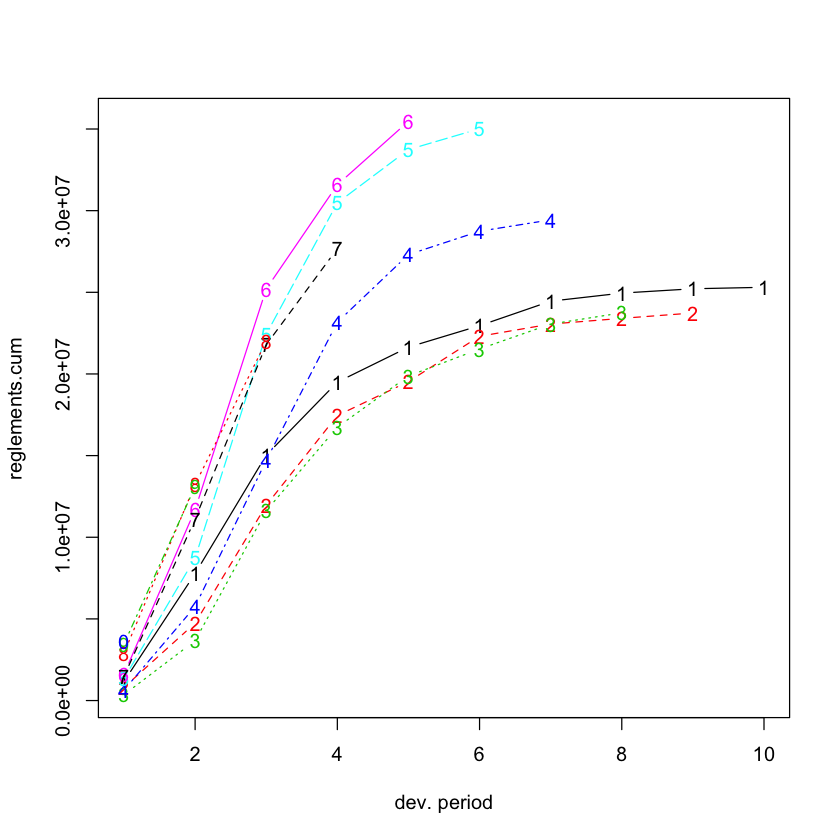

In [51]:
plot(reglements.cum)

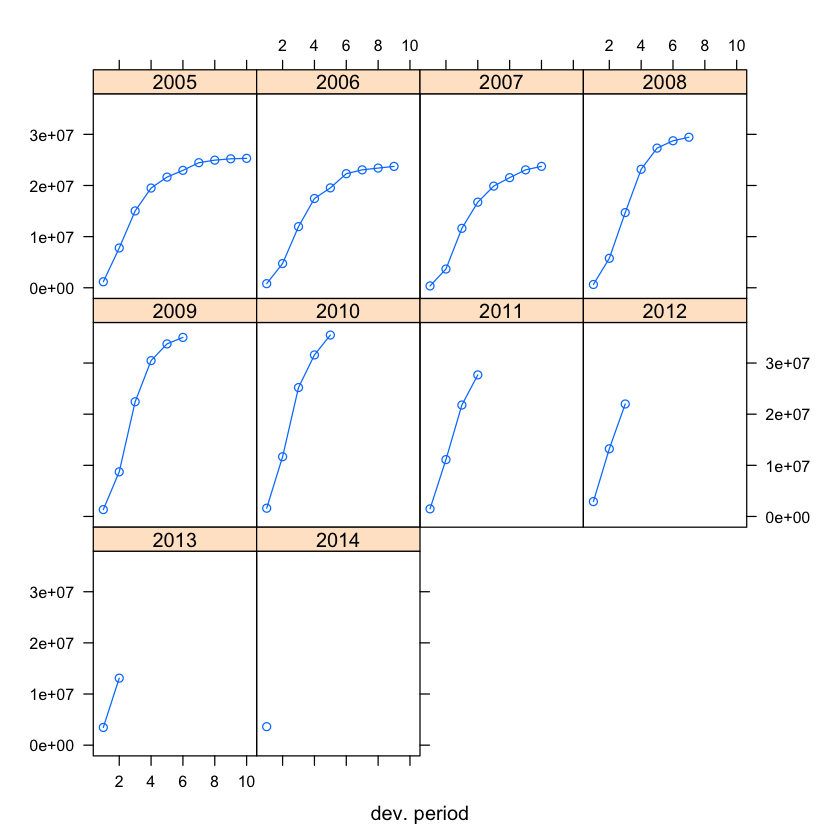

In [52]:
plot(reglements.cum, lattice=TRUE)

- On constate des irrégularités dues à la grande évolution de règlements de sinistres au cours des années surtout pour l’année 2010 , Ce qui montre une mauvaise
  gestion des sinistres ou bien l'existance des clients abérrants par la présence soit d'un grand nobmre de sinistres soit des sinistres avec des coûts de règlements     importants.

In [53]:
# Analyse des cadences :

In [54]:
reglements.cad = reglements.cum

In [55]:
n_row = nrow(reglements.cad)
for( i in 1: 10){ #ligne
    reglements.cad[i,1]=NA
    
    for( j in 2:n_row) { #colonne
    reglements.cad[i,j] = round((reglements.cum[i,j] / reglements.cum[i,j-1])*100,2)
    }
    n_row = n_row -1
    }

ERROR: Error in reglements.cad[i, j] <- round((reglements.cum[i, j]/reglements.cum[i, : replacement has length zero


In [56]:
reglements.cad

,1,2,3,4,5,6,7,8,9,10
2005,NA,663.54,193.20,129.79,110.98,106.08,106.54,102.03,101.06,100.36
2006,NA,590.12,252.24,145.99,111.90,114.21,103.36,101.51,101.40,NA
2007,NA,1017.53,317.04,144.07,118.72,108.31,107.08,102.99,NA,NA
2008,NA,900.73,255.36,157.57,117.87,105.24,102.42,NA,NA,NA
2009,NA,648.60,257.08,135.86,110.71,103.79,NA,NA,NA,NA
2010,NA,724.03,215.73,125.31,112.30,NA,NA,NA,NA,NA
2011,NA,749.11,195.98,127.02,NA,NA,NA,NA,NA,NA
2012,NA,455.01,166.24,NA,NA,NA,NA,NA,NA,NA
2013,NA,378.17,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- On remarque une forte irrégularité pour les sept premières années expliquée par la grande fluctuation des valeurs de réglements cumulés.
- Ils existent des valeurs très anormales surtout pour la première années de développement surtout pour la valeur 1017.53%qui correspond à l''année 2007, par contre,
  les valeurs commencent à se stabiliser à partir de la huitième année de développement pour atteindre des valeurs normales .

In [57]:
# Analyse des cadences :

In [58]:
Moy=c()
EcarT=c()
Coef_Var=c()
Min=c()
Max=c()
n_row = nrow(reglements.cad)
for(i in 1:10)
{
    
    Moy[i-1]=c(mean(reglements.cad[,i][1:(11-i)]))
    #EcarT[i-1]=c(sd(ouvertures.cad[,i][1:(11-i)]))
    EcarT[i-1]=c(sd.p(reglements.cad[,i][1:(11-i)]))
    EcarT[9]=0
    Coef_Var[i-1]=c((EcarT[i-1]/Moy[i-1])*100 )
    Min[i-1]=c( (Moy[i-1]-EcarT[i-1]) )
    Max[i-1]=c((EcarT[i-1]+Moy[i-1]) )
    
}

In [59]:
Factor <- sprintf("%d", 1:9) 
Moyenne=(Moy)
Ecartype=(EcarT)
Coef_Variation=(Coef_Var)
Minimum=(Min)
Maximun=(Max)
Analyse_cad_reglements = t(data.frame(Factor ,Moyenne,Ecartype,Coef_Variation,Minimum,Maximun))

In [60]:
Analyse_cad_reglements

Factor,1,2,3,4,5,6,7,8,9
Moyenne,680.7600,231.6087,137.9443,113.7467,107.5260,104.8500,102.1767,101.2300,100.3600
Ecartype,188.6840461,45.0095844,10.9363638,3.2689125,3.6486962,1.9971229,0.6130434,0.1700000,0.0000000
Coef_Variation,27.7166764,19.4334559,7.9281021,2.8738534,3.3933153,1.9047429,0.5999838,0.1679344,0.0000000
Minimum,492.0760,186.5992,127.0079,110.4778,103.8773,102.8529,101.5636,101.0600,100.3600
Maximun,869.4440,276.6183,148.8806,117.0156,111.1747,106.8471,102.7897,101.4000,100.3600


- On constate la présence des valeurs excentrique pour les sept premières ans surtout pour la première année de développement avec une moyenne de 680.7600%. 
- En plus une forte volatilité est ramarquable, avec des valeurs de coefficients de variations allant de 138.23% de la 1re année jusqu’à 0.61% de la septième année.
- Donc, Ce Triangle d''analyse de règlements de sinistres cumulés nous confirme la présence des irrégularités peut qui sont probablement expliquées par la présence 
  du mauvais gestion des sinistres ou de retard de règlement de ces sinistres.

---

In [61]:
### Triangle des charges (cumulés) :

In [66]:
tri_charge = reglements.cum + tri_provisions_SAP

In [67]:
tri_charge

,1,2,3,4,5,6,7,8,9,10
2005,25045962,30954620,33050733,31349970,30751672,29799269,29158652,28396590,27732514,27752608
2006,22888865,32798212,32628708,32133456,30762407,28824518,28174906,27340405,26872939,NA
2007,23478829,35405413,37229598,36496081,34053727,31401782,30261940,29884351,NA,NA
2008,28759303,42718157,44619548,43721478,40612950,38997945,38030029,NA,NA,NA
2009,33658423,56720354,58115989,56472277,52464696,50648367,NA,NA,NA,NA
2010,39995511,56285084,56005790,52982562,50614425,NA,NA,NA,NA,NA
2011,38910075,55571562,53058812,50125412,NA,NA,NA,NA,NA,NA
2012,51589381,65226156,65848408,NA,NA,NA,NA,NA,NA,NA
2013,47829213,64537252,NA,NA,NA,NA,NA,NA,NA,NA
2014,43231429,NA,NA,NA,NA,NA,NA,NA,NA,NA


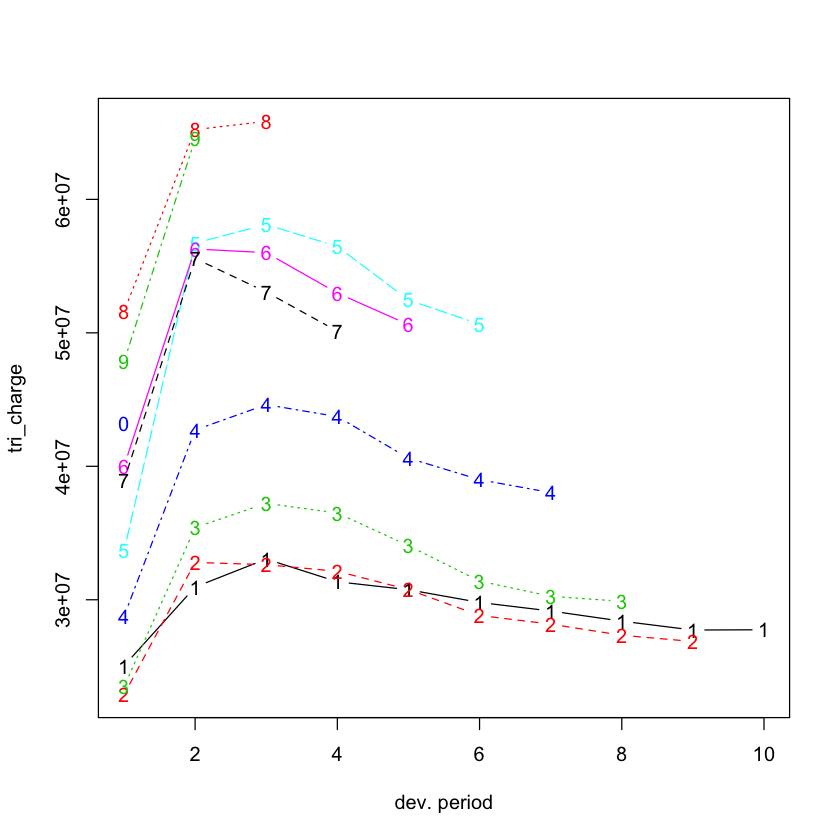

In [68]:
plot(tri_charge)

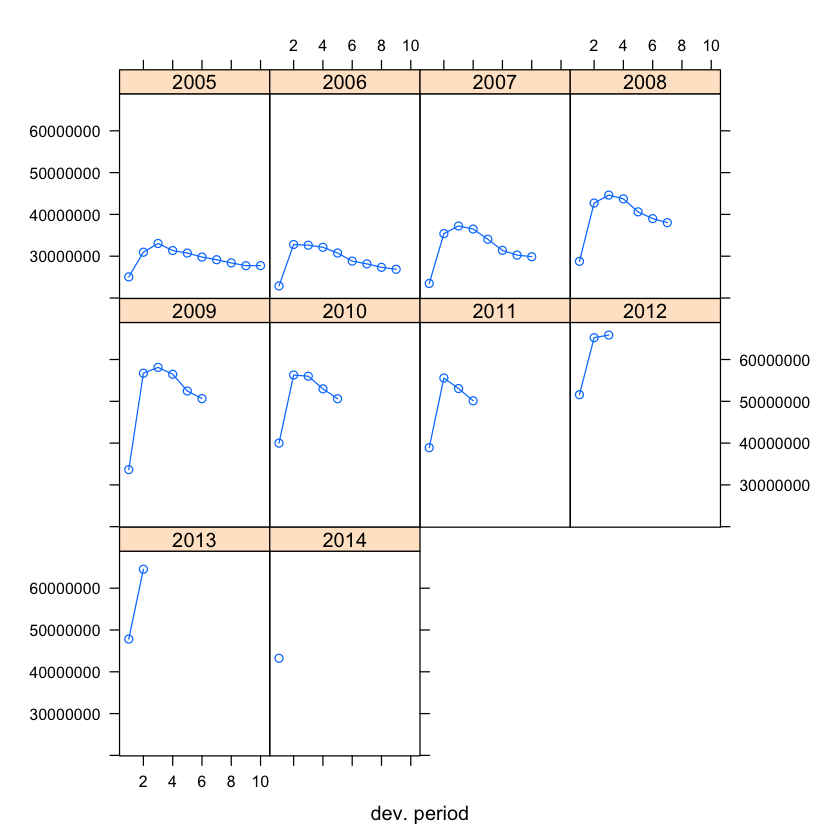

In [69]:
plot(tri_charge, lattice=TRUE)

- On constate la croissance des charges de sinistres au cours des années et il atteints le maximum l’année 2012 .
- Cela nous montre des irrégularités dans la gestion des règlements des sinistres et la gestion de provisionnement des sinistres à payer.

In [70]:
# Triangle des cadences :

In [71]:
tri_charge.cad = tri_charge

In [72]:
n_row = nrow(tri_charge.cad)
for( i in 1: 10){ #ligne
    tri_charge.cad[i,1]=NA
    
    for( j in 2:n_row) { #colonne
    tri_charge.cad[i,j] = round((tri_charge[i,j] / tri_charge[i,j-1])*100,2)
    }
    n_row = n_row -1
    }

ERROR: Error in tri_charge.cad[i, j] <- round((tri_charge[i, j]/tri_charge[i, : replacement has length zero


In [73]:
tri_charge.cad

,1,2,3,4,5,6,7,8,9,10
2005,NA,123.59,106.77,94.85,98.09,96.90,97.85,97.39,97.66,100.07
2006,NA,143.29,99.48,98.48,95.73,93.70,97.75,97.04,98.29,NA
2007,NA,150.80,105.15,98.03,93.31,92.21,96.37,98.75,NA,NA
2008,NA,148.54,104.45,97.99,92.89,96.02,97.52,NA,NA,NA
2009,NA,168.52,102.46,97.17,92.90,96.54,NA,NA,NA,NA
2010,NA,140.73,99.50,94.60,95.53,NA,NA,NA,NA,NA
2011,NA,142.82,95.48,94.47,NA,NA,NA,NA,NA,NA
2012,NA,126.43,100.95,NA,NA,NA,NA,NA,NA,NA
2013,NA,134.93,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- On constate une forte irrégularité pour la première année.De plus, il existe des valeurs très atypiques pour pour chaque première année des années de développement 
 de 168.52% et 150.80% respectivement pour les années 2009 et 2007.
- Puis, les valeurs commencent à se stabiliser pour atteindre des valeurs normales à partir de la deuxième année de développement.

In [74]:
# Analyse des cadences :

In [75]:
Moy=c()
EcarT=c()
Coef_Var=c()
Min=c()
Max=c()
n_row = nrow(tri_charge.cad)
for(i in 1:10)
{
    
    Moy[i-1]=c(mean(tri_charge.cad[,i][1:(11-i)]))
    #EcarT[i-1]=c(sd(ouvertures.cad[,i][1:(11-i)]))
    EcarT[i-1]=c(sd.p(tri_charge.cad[,i][1:(11-i)]))
    EcarT[9]=0
    Coef_Var[i-1]=c((EcarT[i-1]/Moy[i-1])*100 )
    Min[i-1]=c( (Moy[i-1]-EcarT[i-1]) )
    Max[i-1]=c((EcarT[i-1]+Moy[i-1]) )
    
}

In [76]:
Factor <- sprintf("%d", 1:9) 
Moyenne=(Moy)
Ecartype=(EcarT)
Coef_Variation=(Coef_Var)
Minimum=(Min)
Maximun=(Max)
Analyse_cad_charges = t(data.frame(Factor ,Moyenne,Ecartype,Coef_Variation,Minimum,Maximun))

In [77]:
Analyse_cad_charges

Factor,1,2,3,4,5,6,7,8,9
Moyenne,142.18333,101.78000,96.51286,94.74167,95.07400,97.37250,97.72667,97.97500,100.07000
Ecartype,12.7301340,3.4408502,1.6640116,1.9008631,1.8148675,0.5910319,0.7375786,0.3150000,0.0000000
Coef_Variation,8.9533236,3.3806742,1.7241347,2.0063644,1.9088999,0.6069803,0.7547363,0.3215106,0.0000000
Minimum,129.45320,98.33915,94.84885,92.84080,93.25913,96.78147,96.98909,97.66000,100.07000
Maximun,154.91347,105.22085,98.17687,96.64253,96.88887,97.96353,98.46425,98.29000,100.07000


- On remarque que pour la première année de développement la présence d’une valeurs atypique avec une moyenne de 142.18% .
- On constate la présence d’une grande volatilité pour les sept premières années avec des valeurs de coefficients de variations allant de 8.95% jusqu’à 0.75% .
- Cela confirme que la triangle des charges de sinistre cumulés présente des irrégularités expliquées par la mauvaise prédiction des Provisions SAP ou de retard de       règlement des sinistres.

---

In [78]:
### Triangle des couts moyens :

In [79]:
tri_cout_moyens = tri_charge / ouvertures.cum

In [80]:
tri_cout_moyens

,1,2,3,4,5,6,7,8,9,10
2005,18831.55,14173.36,14585.50,13689.94,13405.262,12990.091,12688.708,12357.089,12068.11,12076.85
2006,17209.67,14881.22,14348.60,13971.07,13305.539,12467.352,12186.378,11825.435,11623.24,NA
2007,13146.04,11078.04,11086.84,10671.37,9899.339,9123.121,8786.858,8672.185,NA,NA
2008,12624.80,11141.93,11149.31,10800.76,10013.055,9610.139,9362.390,NA,NA,NA
2009,13106.86,13667.56,13427.91,12887.33,11950.956,11531.960,NA,NA,NA,NA
2010,16804.84,14566.53,14043.58,13166.64,12553.181,NA,NA,NA,NA,NA
2011,16052.01,14678.17,13364.94,12450.43,NA,NA,NA,NA,NA,NA
2012,21971.63,16496.25,15745.67,NA,NA,NA,NA,NA,NA,NA
2013,19411.21,16471.99,NA,NA,NA,NA,NA,NA,NA,NA
2014,21790.03,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [81]:
# Triangle des cadences :

In [82]:
tri_cout_moyens.cad = tri_cout_moyens

In [83]:
n_row = nrow(tri_charge.cad)
for( i in 1: 10){ #ligne
    tri_cout_moyens.cad[i,1]=NA
    
    for( j in 2:n_row) { #colonne
    tri_cout_moyens.cad[i,j] = round((tri_cout_moyens[i,j] / tri_cout_moyens[i,j-1])*100,2)
    }
    n_row = n_row -1
    }

ERROR: Error in tri_cout_moyens.cad[i, j] <- round((tri_cout_moyens[i, j]/tri_cout_moyens[i, : replacement has length zero


In [84]:
tri_cout_moyens.cad

,1,2,3,4,5,6,7,8,9,10
2005,NA,75.26,102.91,93.86,97.92,96.90,97.68,97.39,97.66,100.07
2006,NA,86.47,96.42,97.37,95.24,93.70,97.75,97.04,98.29,NA
2007,NA,84.27,100.08,96.25,92.77,92.16,96.31,98.69,NA,NA
2008,NA,88.25,100.07,96.87,92.71,95.98,97.42,NA,NA,NA
2009,NA,104.28,98.25,95.97,92.73,96.49,NA,NA,NA,NA
2010,NA,86.68,96.41,93.76,95.34,NA,NA,NA,NA,NA
2011,NA,91.44,91.05,93.16,NA,NA,NA,NA,NA,NA
2012,NA,75.08,95.45,NA,NA,NA,NA,NA,NA,NA
2013,NA,84.86,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [85]:
# Analyse des cadences :

In [86]:
Moy=c()
EcarT=c()
Coef_Var=c()
Min=c()
Max=c()
n_row = nrow(tri_cout_moyens.cad)
for(i in 1:10)
{
    
    Moy[i-1]=c(mean(tri_cout_moyens.cad[,i][1:(11-i)]))
    #EcarT[i-1]=c(sd(ouvertures.cad[,i][1:(11-i)]))
    EcarT[i-1]=c(sd.p(tri_cout_moyens.cad[,i][1:(11-i)]))
    EcarT[9]=0
    Coef_Var[i-1]=c((EcarT[i-1]/Moy[i-1])*100 )
    Min[i-1]=c( (Moy[i-1]-EcarT[i-1]) )
    Max[i-1]=c((EcarT[i-1]+Moy[i-1]) )
    
}

In [87]:
Factor <- sprintf("%d", 1:9) 
Moyenne=(Moy)
Ecartype=(EcarT)
Coef_Variation=(Coef_Var)
Minimum=(Min)
Maximun=(Max)
Analyse_cad_cout_moyens = t(data.frame(Factor ,Moyenne,Ecartype,Coef_Variation,Minimum,Maximun))

In [88]:
Analyse_cad_cout_moyens

Factor,1,2,3,4,5,6,7,8,9
Moyenne,86.28778,97.58000,95.32000,94.45167,95.04600,97.29000,97.70667,97.97500,100.07000
Ecartype,8.2167779,3.3763923,1.5640241,1.9263732,1.8185445,0.5790078,0.7098513,0.3150000,0.0000000
Coef_Variation,9.5225281,3.4601274,1.6408142,2.0395334,1.9133309,0.5951360,0.7265127,0.3215106,0.0000000
Minimum,78.07100,94.20361,93.75598,92.52529,93.22746,96.71099,96.99682,97.66000,100.07000
Maximun,94.50456,100.95639,96.88402,96.37804,96.86454,97.86901,98.41652,98.29000,100.07000


---

In [89]:
### Triangle Réglements/Charge :

In [90]:
tri_Reg_ch = (reglements.cum / tri_charge)*100

In [91]:
tri_Reg_ch

,1,2,3,4,5,6,7,8,9,10
2005,4.679237,25.12198,45.45819,62.20188,70.37219,77.03587,83.87515,87.87018,90.92820,91.19167
2006,3.509353,14.45257,36.64456,54.32112,63.49239,77.38950,81.83495,85.60735,88.31672,NA
2007,1.534169,10.35211,31.21208,45.87210,58.36755,68.55839,76.18044,79.44810,NA,NA
2008,2.222867,13.47958,32.95447,52.99251,67.24490,73.69775,77.40337,NA,NA,NA
2009,3.996982,15.38391,38.59895,53.96645,64.30838,69.13807,NA,NA,NA,NA
2010,4.034520,20.75715,45.00189,59.61165,70.07888,NA,NA,NA,NA,NA
2011,3.814403,20.00709,41.06740,55.21509,NA,NA,NA,NA,NA,NA
2012,5.636150,20.28335,33.40030,NA,NA,NA,NA,NA,NA,NA
2013,7.245925,20.30781,NA,NA,NA,NA,NA,NA,NA,NA
2014,8.373087,NA,NA,NA,NA,NA,NA,NA,NA,NA


---

In [92]:
### Triangle Boni/Mali :

In [93]:
tri_Boni_Mali = reglements.cum 

In [94]:
n_row = nrow(reglements.cum)
for( i in 1: 10){ #ligne
    tri_Boni_Mali[i,1]=NA
    
    for( j in 2:10) { #colonne
    tri_Boni_Mali[i,j] = (tri_cout_moyens[i,j-1]-tri_cout_moyens[i,j]) * ouvertures.cum[i,j]
    }
    }

In [95]:
tri_Boni_Mali

,1,2,3,4,5,6,7,8,9,10
2005,NA,10173486,-933897.41,2050814.9,653057.8,952403,692577.4,762062.0,664076,-20094
2006,NA,5131907,1211189.50,868315.5,1538701.8,1937889,649612.0,834501.0,467466,NA
2007,NA,6609334,-29542.66,1420900.9,2655781.4,2671744,1158088.2,395162.7,NA,NA
2008,NA,5685341,-29546.87,1410938.4,3194934.1,1635031,1006356.6,NA,NA,NA
2009,NA,-2326874,1037189.82,2368819.1,4110679.6,1840231,NA,NA,NA,NA
2010,NA,8648804,2085544.11,3528796.8,2473470.1,NA,NA,NA,NA,NA
2011,NA,5201352,5213533.78,3681836.6,NA,NA,NA,NA,NA,NA
2012,NA,21649659,3138892.05,NA,NA,NA,NA,NA,NA,NA
2013,NA,11515855,NA,NA,NA,NA,NA,NA,NA,NA
2014,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


<h2><font color ="fuchsia"> Feuil : Estimation : </font><h2>

---

In [96]:
### pour Tringle des ouvertures :

In [97]:
#### Méthode chain-ladder classique :

In [98]:
ouvertures.cum_chLadder = chainladder(ouvertures.cum)
predict(ouvertures.cum_chLadder)   

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184.000,2266.000,2290.000,2294.000,2294.000,2298.000,2298.000,2298.000,2298.000
2006,1330,2204.000,2274.000,2300.000,2312.000,2312.000,2312.000,2312.000,2312.000,2312.000
2007,1786,3196.000,3358.000,3420.000,3440.000,3442.000,3444.000,3446.000,3446.000,3446.000
2008,2278,3834.000,4002.000,4048.000,4056.000,4058.000,4062.000,4063.009,4063.009,4063.009
2009,2568,4150.000,4328.000,4382.000,4390.000,4392.000,4395.628,4396.719,4396.719,4396.719
2010,2380,3864.000,3988.000,4024.000,4032.000,4033.467,4036.799,4037.801,4037.801,4037.801
2011,2424,3786.000,3970.000,4026.000,4037.804,4039.273,4042.610,4043.614,4043.614,4043.614
2012,2348,3954.000,4182.000,4234.565,4246.980,4248.525,4252.035,4253.091,4253.091,4253.091
2013,2464,3918.000,4090.454,4141.868,4154.012,4155.523,4158.956,4159.989,4159.989,4159.989
2014,1984,3262.247,3405.837,3448.646,3458.758,3460.016,3462.874,3463.734,3463.734,3463.734


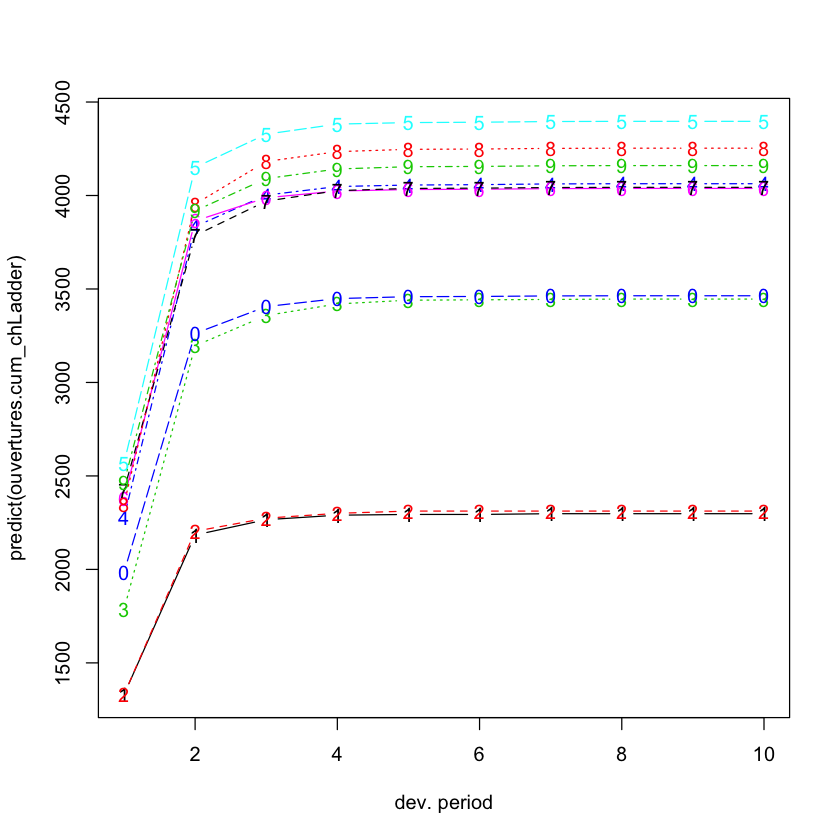

In [99]:
plot(predict(ouvertures.cum_chLadder))

In [100]:
#### Méthode Mack chain-ladder :

In [101]:
ouvertures.cum_chMack = MackChainLadder(ouvertures.cum, est.sigma="Mack")
ouvertures.cum_chMack

Warning message in Mack.S.E(CL[["Models"]], FullTriangle, est.sigma = est.sigma, :
“Information: essentially no variation in development data for period(s):
'8-9'”

MackChainLadder(Triangle = ouvertures.cum, est.sigma = "Mack")

     Latest Dev.To.Date Ultimate     IBNR Mack.S.E CV(IBNR)
2005  2,298       1.000    2,298     0.00 0.00e+00      NaN
2006  2,312       1.000    2,312     0.00 1.89e-25      Inf
2007  3,446       1.000    3,446     0.00 5.51e-13      Inf
2008  4,062       1.000    4,063     1.01 1.43e+00    1.413
2009  4,392       0.999    4,397     4.72 3.14e+00    0.666
2010  4,032       0.999    4,038     5.80 3.16e+00    0.544
2011  4,026       0.996    4,044    17.61 8.06e+00    0.458
2012  4,182       0.983    4,253    71.09 1.51e+01    0.212
2013  3,918       0.942    4,160   241.99 3.88e+01    0.160
2014  1,984       0.573    3,464 1,479.73 1.53e+02    0.103

             Totals
Latest:   34,652.00
Dev:           0.95
Ultimate: 36,473.96
IBNR:      1,821.96
Mack.S.E     160.61
CV(IBNR):      0.09

- On remarquer que le nombre de tardifs par l’estimation ponctuel vaut 1,821.96 qui presque égale à celle de chain ladder de 1822 .

In [102]:
ouvertures.cum_chMack$f

[1] 1.644278 1.044016 1.012569 1.002932 1.000364 1.000826 1.000248 1.000000
 [9] 1.000000 1.000000

- On remarque que les facteurs de développement obtenus par la méthode de Mack sont presque égaux aux celles de la méthode de Chain Ladder.

In [103]:
ouvertures.cum_chMack$FullTriangle

,1,2,3,4,5,6,7,8,9,10
2005,1330,2184.000,2266.000,2290.000,2294.000,2294.000,2298.000,2298.000,2298.000,2298.000
2006,1330,2204.000,2274.000,2300.000,2312.000,2312.000,2312.000,2312.000,2312.000,2312.000
2007,1786,3196.000,3358.000,3420.000,3440.000,3442.000,3444.000,3446.000,3446.000,3446.000
2008,2278,3834.000,4002.000,4048.000,4056.000,4058.000,4062.000,4063.009,4063.009,4063.009
2009,2568,4150.000,4328.000,4382.000,4390.000,4392.000,4395.628,4396.719,4396.719,4396.719
2010,2380,3864.000,3988.000,4024.000,4032.000,4033.467,4036.799,4037.801,4037.801,4037.801
2011,2424,3786.000,3970.000,4026.000,4037.804,4039.273,4042.610,4043.614,4043.614,4043.614
2012,2348,3954.000,4182.000,4234.565,4246.980,4248.525,4252.035,4253.091,4253.091,4253.091
2013,2464,3918.000,4090.454,4141.868,4154.012,4155.523,4158.956,4159.989,4159.989,4159.989
2014,1984,3262.247,3405.837,3448.646,3458.758,3460.016,3462.874,3463.734,3463.734,3463.734


In [104]:
#plot(ouvertures.cum_chMack$FullTriangle)

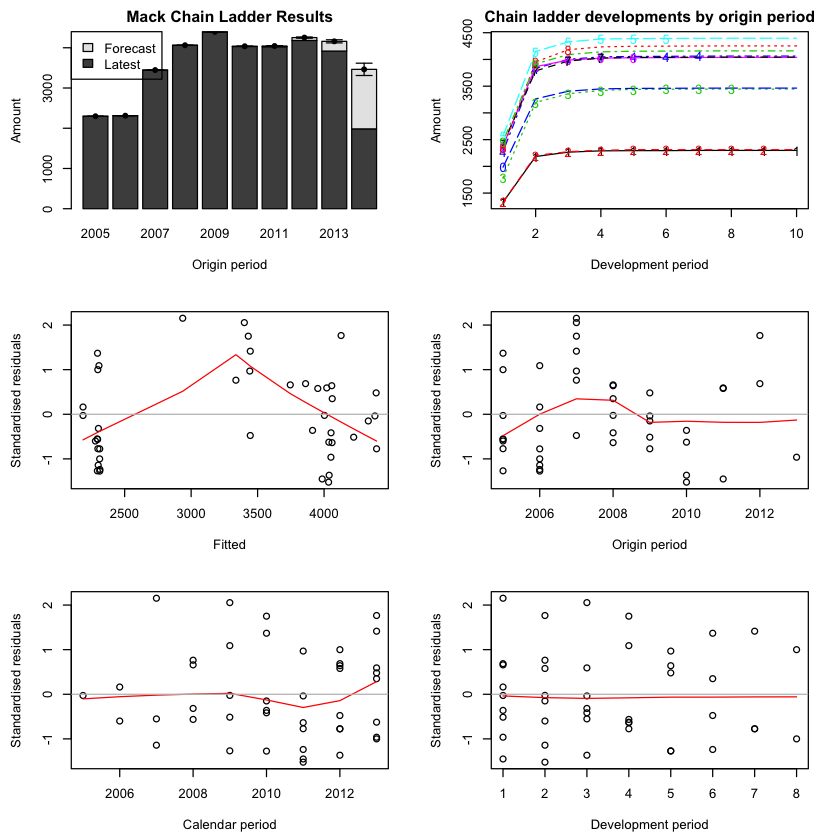

In [105]:
plot(ouvertures.cum_chMack)

- Pour les deux derniéres années, la prévision est supérieure aux nombre de sinistres effectués, De plus, on peut vérifier la troisième hypothèse de modèle de 
  Mack : les résidus sont non structurés.

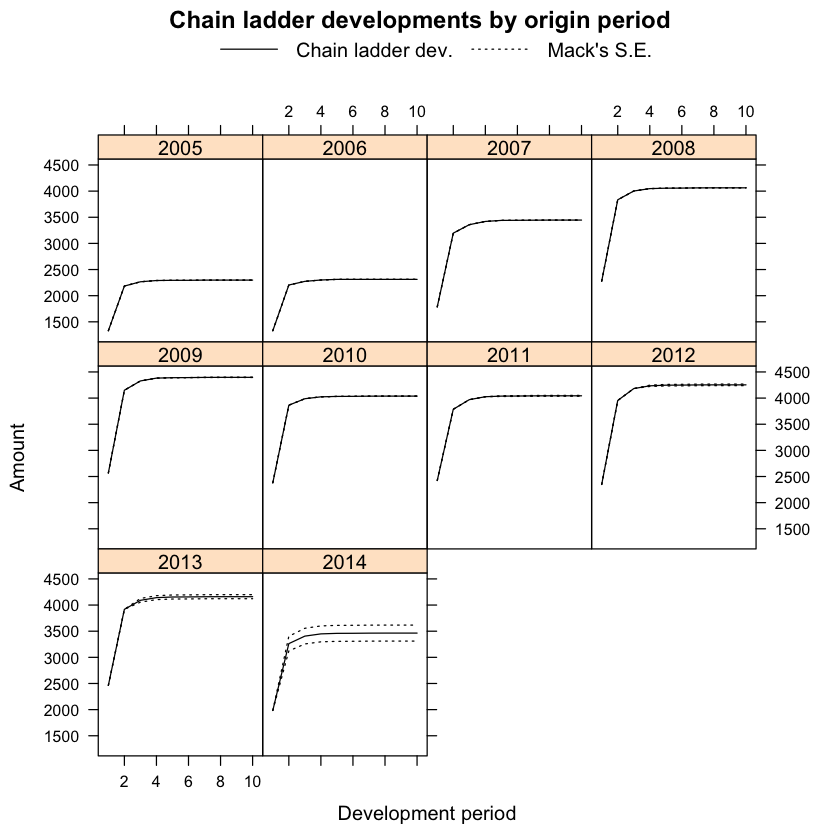

In [106]:
plot(ouvertures.cum_chMack, lattice=TRUE)

- Ce graphe montre une visibilité sur l’estimation des tardifs pour les différents années de survenances au cours la période de développement, ce qui permet de     constater que les nombre de tardifs commencent à diminuer pour les dernières années ce qui est normal.

In [107]:
#### Méthode Bootstrap chain-ladder :

In [108]:
ouvertures.cum_chBoot = BootChainLadder(ouvertures.cum, R=999, process.distr="gamma")
ouvertures.cum_chBoot

BootChainLadder(Triangle = ouvertures.cum, R = 999, process.distr = "gamma")

     Latest Mean Ultimate Mean IBNR IBNR.S.E IBNR 75% IBNR 95%
2005  2,298         2,298     0.000     0.00     0.00     0.00
2006  2,312         2,312     0.000     0.00     0.00     0.00
2007  3,446         3,446     0.000     0.00     0.00     0.00
2008  4,062         4,063     0.934     3.09     1.14     6.08
2009  4,392         4,397     4.647     5.45     7.16    15.02
2010  4,032         4,038     5.972     6.18     8.66    18.13
2011  4,026         4,043    16.827     9.80    22.41    34.50
2012  4,182         4,253    70.919    19.03    82.78   102.52
2013  3,918         4,159   240.700    35.44   264.25   300.58
2014  1,984         3,465 1,480.509   115.37 1,553.19 1,671.30

                Totals
Latest:         34,652
Mean Ultimate:  36,473
Mean IBNR:       1,821
IBNR.S.E           126
Total IBNR 75%:  1,903
Total IBNR 95%:  2,032

- On conclu que les nombre des tardiffs obtenus par le modèle bootstrap vaut 1,821 ce qui est presque égale aux valeurs obtenus par les modèles de 
  chain ladder et Mack.
- Les trois méthodes d’estimation de provisionnement(classique, Mack, Boostrap) reposent sur les hypothèses de Chain Ladder.

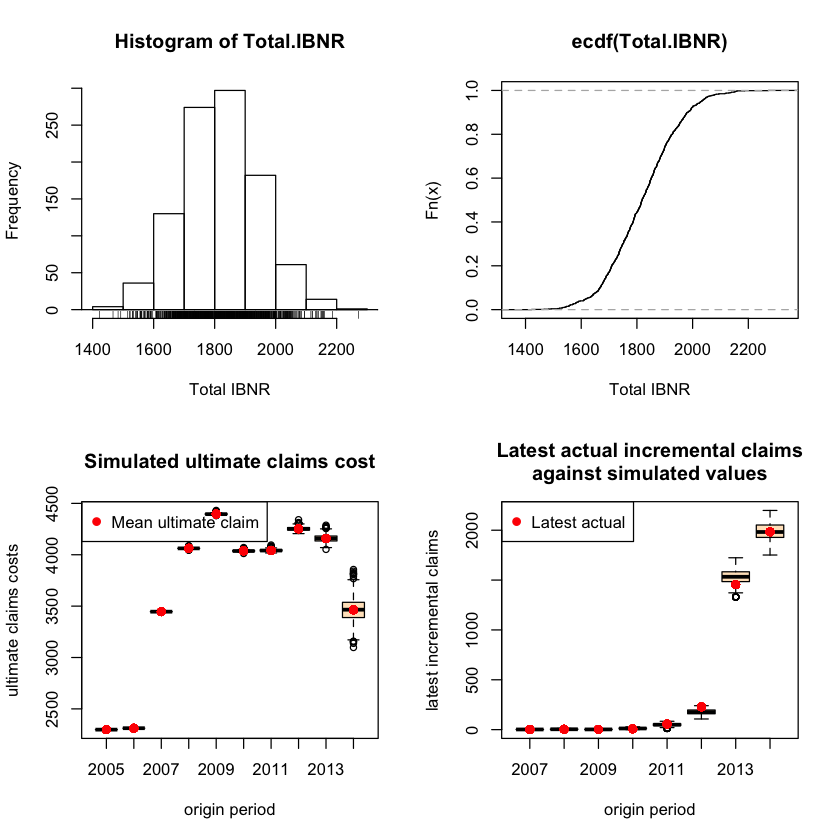

In [109]:
plot(ouvertures.cum_chBoot)

- Le premier graph permet de tracer la distribution d’ouverture de sinistre et à l’aide de la deuxième graphique de la courbe ecdf, on peut remarquer   que cette distribution se rassemble à la loi Log normal.
- les graphiques des boites à moustaches, vérifie la variabilité des ouvertures des sinistres selon les années de survenance ce qui est important       pour les dernières années de 2013 et 2014.

In [110]:
CDR(ouvertures.cum_chBoot)

,IBNR,IBNR.S.E,CDR(1)S.E,CDR(1)75%,CDR(1)95%
2005,0.0000000,0.000000,0.000000,0.000000,0.00000
2006,0.0000000,0.000000,0.000000,0.000000,0.00000
2007,0.0000000,0.000000,0.000000,0.000000,0.00000
2008,0.9343985,3.085518,3.085518,1.140034,6.08008
2009,4.6467396,5.450866,4.679577,6.587076,13.67373
2010,5.9724038,6.178502,3.393462,6.877145,11.91682
2011,16.8265081,9.795547,7.576199,21.141331,32.39884
2012,70.9189809,19.032744,17.049782,82.302787,100.16804
2013,240.7003469,35.443134,29.639205,260.396550,294.06882
2014,1480.5094056,115.369186,108.581052,1553.911841,1664.18353


- la fct CDR() visualise le nombre de tardifs, selon la méthode boostrap chain-ladder de chaque année.

---

In [111]:
### pour Tringle des ouvertures :

In [112]:
#### Méthode chain-ladder classique :

In [113]:
reglements.cum_chLadder = chainladder(reglements.cum)
predict(reglements.cum_chLadder)   

,1,2,3,4,5,6,7,8,9,10
2005,1171960,7776414,15024265,19500272,21640626,22956127,24456862,24952134,25216676,25308068
2006,803251,4740184,11956646,17455254,19531787,22307150,23056920,23405397,23733299,23819315
2007,360205,3665207,11620132,16741519,19876327,21528556,23053680,23742549,24033427,24120530
2008,639281,5758227,14704134,23169110,27310136,28740609,29436525,30075842,30444311,30554649
2009,1345321,8725810,22432161,30476081,33739194,35017303,36656343,37452463,37911305,38048706
2010,1613627,11683178,25203664,31583780,35470021,37925269,39700421,40562654,41059600,41208411
2011,1484187,11118250,21789874,27676790,31390657,33563531,35134524,35897593,36337386,36469082
2012,2907655,13230048,21993566,29855485,33861705,36205625,37900286,38723422,39197836,39339899
2013,3465669,13106100,28438520,38604281,43784476,46815255,49006516,50070863,50684297,50867991
2014,3619805,20946236,45450588,61697560,69976575,74820380,78322464,80023509,81003904,81297483


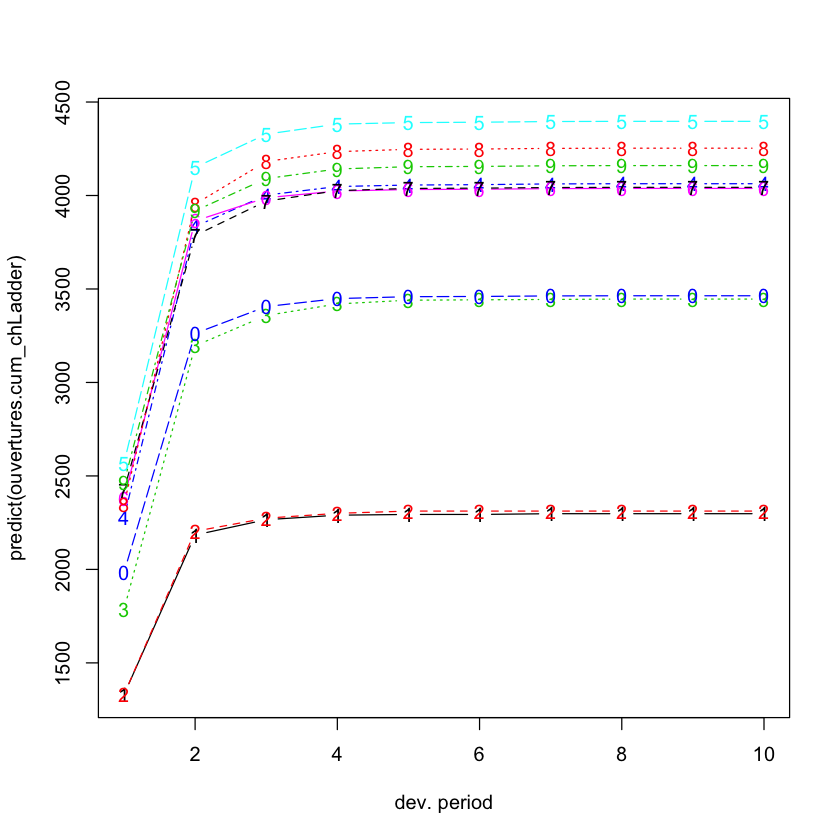

In [114]:
plot(predict(ouvertures.cum_chLadder))

In [115]:
#### Méthode Mack chain-ladder :

In [116]:
reglements.cum_chMack = MackChainLadder(reglements.cum, est.sigma="Mack")
reglements.cum_chMack

MackChainLadder(Triangle = reglements.cum, est.sigma = "Mack")

         Latest Dev.To.Date   Ultimate       IBNR   Mack.S.E CV(IBNR)
2005 25,308,068      1.0000 25,308,068          0          0      NaN
2006 23,733,299      0.9964 23,819,315     86,016     26,429    0.307
2007 23,742,549      0.9843 24,120,530    377,981     75,580    0.200
2008 29,436,525      0.9634 30,554,649  1,118,124    252,512    0.226
2009 35,017,303      0.9203 38,048,706  3,031,403    868,343    0.286
2010 35,470,021      0.8607 41,208,411  5,738,390  1,691,732    0.295
2011 27,676,790      0.7589 36,469,082  8,792,292  1,916,223    0.218
2012 21,993,566      0.5591 39,339,899 17,346,333  3,811,911    0.220
2013 13,106,100      0.2576 50,867,991 37,761,891  9,873,002    0.261
2014  3,619,805      0.0445 81,297,483 77,677,678 22,941,570    0.295

                  Totals
Latest:   239,104,026.00
Dev:                0.61
Ultimate: 391,034,134.32
IBNR:     151,930,108.32
Mack.S.E   27,085,649.33
CV(IBNR):      

- On remarque que le règlement des sinistres par l’estimation ponctuel vaut 151,930,108.32 qui presque égale à celle de chain ladder de 151,930,121 .

In [117]:
reglements.cum_chMack$f

[1] 5.786565 2.169869 1.357464 1.134187 1.069220 1.046807 1.021718 1.012251
 [9] 1.003624 1.000000

- On remarque que les facteurs de développement obtenus par la méthode de Mack sont presque égaux aux celles de la méthode de Chain Ladder.

In [118]:
reglements.cum_chMack$FullTriangle

,1,2,3,4,5,6,7,8,9,10
2005,1171960,7776414,15024265,19500272,21640626,22956127,24456862,24952134,25216676,25308068
2006,803251,4740184,11956646,17455254,19531787,22307150,23056920,23405397,23733299,23819315
2007,360205,3665207,11620132,16741519,19876327,21528556,23053680,23742549,24033427,24120530
2008,639281,5758227,14704134,23169110,27310136,28740609,29436525,30075842,30444311,30554649
2009,1345321,8725810,22432161,30476081,33739194,35017303,36656343,37452463,37911305,38048706
2010,1613627,11683178,25203664,31583780,35470021,37925269,39700421,40562654,41059600,41208411
2011,1484187,11118250,21789874,27676790,31390657,33563531,35134524,35897593,36337386,36469082
2012,2907655,13230048,21993566,29855485,33861705,36205625,37900286,38723422,39197836,39339899
2013,3465669,13106100,28438520,38604281,43784476,46815255,49006516,50070863,50684297,50867991
2014,3619805,20946236,45450588,61697560,69976575,74820380,78322464,80023509,81003904,81297483


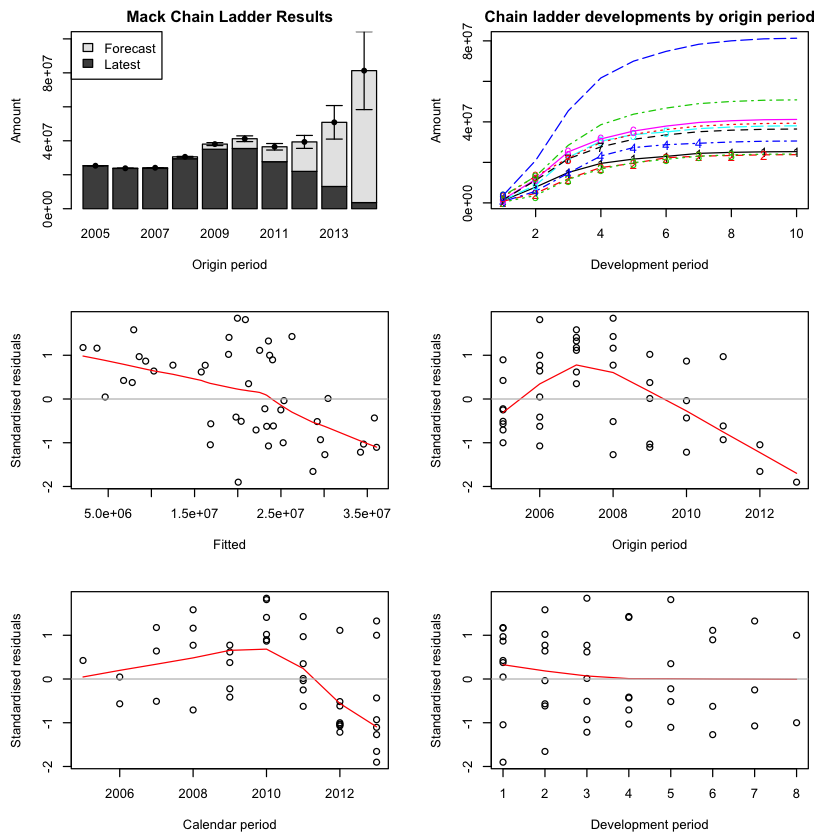

In [119]:
plot(reglements.cum_chMack)

- le premier graph (dont il y a des boxplot) montre que pour les cinq dernières années, l''estimation des valeurs de règlement des sinistres avec 
  une large Intervalle d’erreur particulièrement pour l’année 2014, en plus, on peut aussi vérifier la 3me hypothèse de modèle de Mack que les 
  résidus sont non structurés.

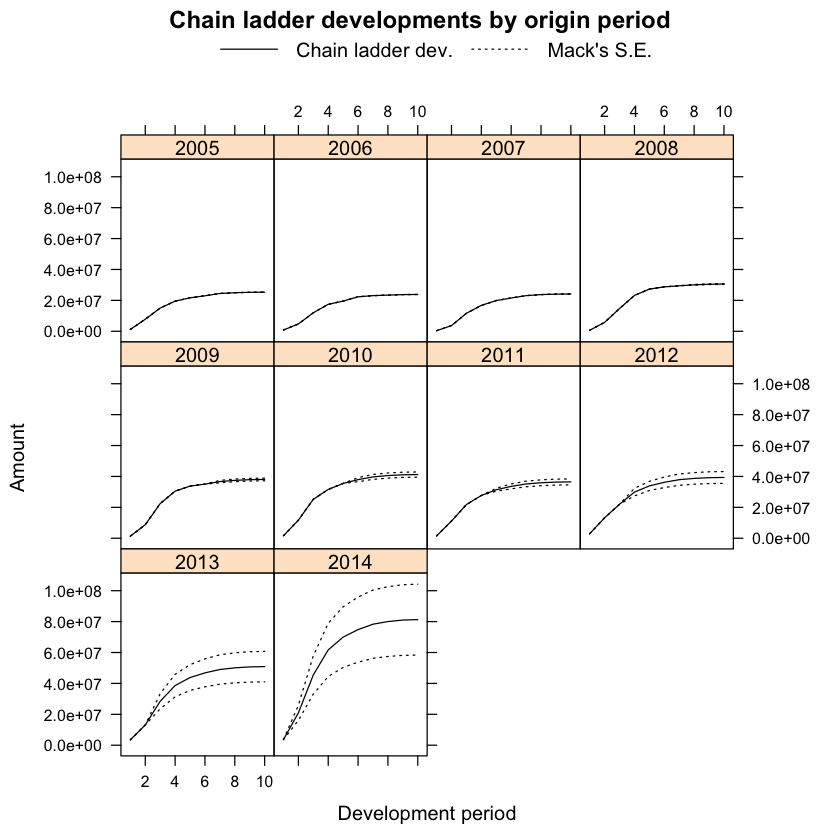

In [120]:
plot(reglements.cum_chMack, lattice=TRUE)

- Ce graphe montre une visibilité sur l’estimation des règlements pour les différents années de survenances au cours de la période de développement,   ce qui permet de constater que les nombre de tardifs commencent à diminuer pour les dernières années.

In [121]:
#### Méthode Bootstrap chain-ladder :

In [122]:
reglements.cum_chBoot = BootChainLadder(reglements.cum, R=999, process.distr="gamma")
reglements.cum_chBoot

BootChainLadder(Triangle = reglements.cum, R = 999, process.distr = "gamma")

         Latest Mean Ultimate  Mean IBNR   IBNR.S.E   IBNR 75% IBNR 95%
2005 25,308,068    25,308,068          0          0          0 0.00e+00
2006 23,733,299    23,812,391     79,092    286,031     95,782 5.44e+05
2007 23,742,549    24,114,712    372,163    491,338    563,840 1.27e+06
2008 29,436,525    30,548,126  1,111,601    796,475  1,562,886 2.66e+06
2009 35,017,303    38,067,072  3,049,769  1,348,878  3,811,587 5.59e+06
2010 35,470,021    41,172,434  5,702,413  1,799,956  6,888,610 8.79e+06
2011 27,676,790    36,401,959  8,725,169  2,219,260 10,108,315 1.26e+07
2012 21,993,566    39,260,871 17,267,305  3,389,196 19,374,320 2.30e+07
2013 13,106,100    51,131,164 38,025,064  7,475,509 42,325,043 5.25e+07
2014  3,619,805    82,641,860 79,022,055 27,102,211 94,477,685 1.29e+08

                  Totals
Latest:         2.39e+08
Mean Ultimate:  3.92e+08
Mean IBNR:      1.53e+08
IBNR.S.E        2.97e+07
Tota

- On voit que les provisions de règlements estimés par le modèle bootstrap vaut 1.55e+08 ce qui est un peu supérieur aux valeurs obtenus par les 
  modèles de chain ladder et Mack.

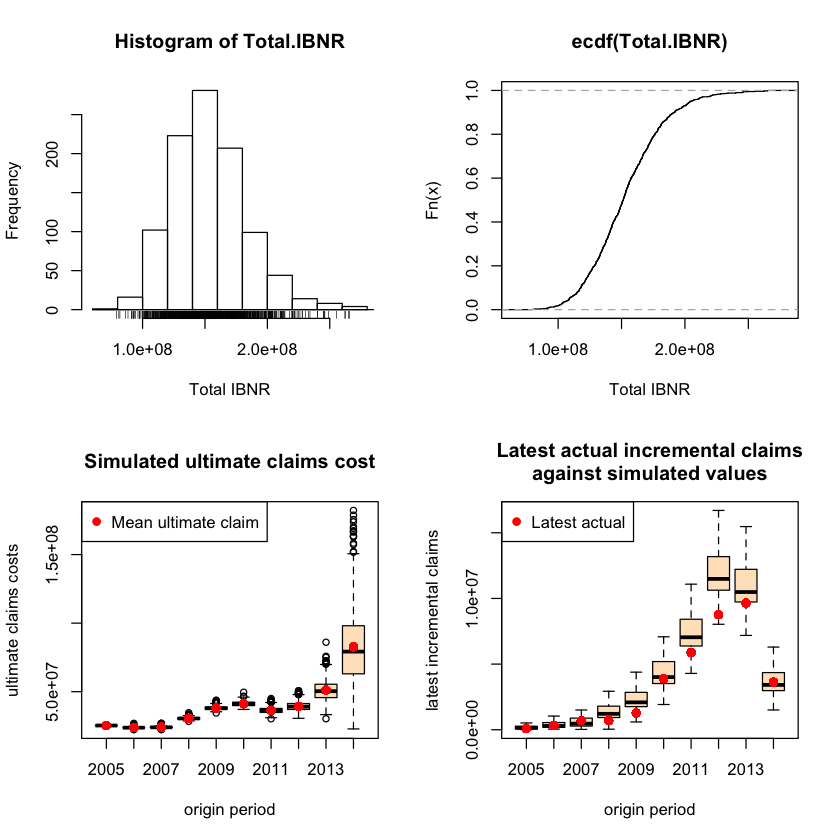

In [123]:
plot(reglements.cum_chBoot)

- Le premier graph permet de tracer la distribution des provisions des règlements et à l’aide de la deuxième graphique de la courbe ecdf, on remarque   que cette distribution se rassemble à la loi Log normal. 
- les graphiques des boites à moustaches vérifie la variabilité des provisions selon les années de survenance ce qui est apparu important pour les     années entre 2010 et 2013.

In [124]:
CDR(reglements.cum_chBoot)

,IBNR,IBNR.S.E,CDR(1)S.E,CDR(1)75%,CDR(1)95%
2005,0.00,0.0,0.0,0.00,0.0
2006,79092.16,286030.5,286030.5,95781.83,544392.2
2007,372163.12,491338.1,420537.0,551312.10,1157276.8
2008,1111600.85,796475.4,623922.6,1452559.30,2260263.8
2009,3049768.88,1348878.2,991916.2,3549955.63,4936962.3
2010,5702412.97,1799955.9,1221510.4,6461418.29,7708543.8
2011,8725168.57,2219260.2,1531559.1,9722388.58,11453405.2
2012,17267304.63,3389196.2,2641570.6,18977460.44,21780043.5
2013,38025064.43,7475508.9,6209137.7,41628469.17,49277339.4
2014,79022055.03,27102211.1,24712964.1,93924352.79,123291126.9


- la fct CDR() visualise le les PSAP_REG, selon la méthode boostrap chain-ladder, de chaque année.

<h2><font color ="fuchsia"> Feuil : Estimtion_BF (Bornhuetter-Ferguson): </font><h2>

---

- La première année de survenance est une année complète (ie tous les sinistres ont été réglé ) et que le S/P de cette année là est de 95% (à la fin), donc on calcule la charge utlime de l’année 2005 comme suit :

$$ Prime acquises = Charge sinistres / S/P = 25308068 : 0.95 = 26640071 $$

In [125]:
tri_reglements.cum_chLadder=predict(reglements.cum_chLadder)
tri_reglements.cum_chLadder

,1,2,3,4,5,6,7,8,9,10
2005,1171960,7776414,15024265,19500272,21640626,22956127,24456862,24952134,25216676,25308068
2006,803251,4740184,11956646,17455254,19531787,22307150,23056920,23405397,23733299,23819315
2007,360205,3665207,11620132,16741519,19876327,21528556,23053680,23742549,24033427,24120530
2008,639281,5758227,14704134,23169110,27310136,28740609,29436525,30075842,30444311,30554649
2009,1345321,8725810,22432161,30476081,33739194,35017303,36656343,37452463,37911305,38048706
2010,1613627,11683178,25203664,31583780,35470021,37925269,39700421,40562654,41059600,41208411
2011,1484187,11118250,21789874,27676790,31390657,33563531,35134524,35897593,36337386,36469082
2012,2907655,13230048,21993566,29855485,33861705,36205625,37900286,38723422,39197836,39339899
2013,3465669,13106100,28438520,38604281,43784476,46815255,49006516,50070863,50684297,50867991
2014,3619805,20946236,45450588,61697560,69976575,74820380,78322464,80023509,81003904,81297483


In [157]:
# Calcul Prime acquises :

Selon l’exercice qu’il existe une évolution annuelle de la prime acquise de 4% , la formule est la suivante :
$$ Prime acquises_{i} = P rime acquises_{i−1} × 1.04 $$

In [129]:
primes=function(triangle, pourcentage=0.95, evolution=1.04){
n=dim(triangle)[1]
M=triangle
####################################
### CALCUL des primes ###
####################################
Primes=rep(1,n)
Primes[1]=M[1,10]/pourcentage
for (i in 2:n){
Primes[i]=evolution*Primes[i-1]
        }
return(Primes)
}

In [131]:
primes(tri_reglements.cum_chLadder)

[1] 26640072 27705674 28813901 29966457 31165116 32411720 33708189 35056517
 [9] 36458777 37917129

In [132]:
BF=function(triangle,primes,ratio){

n=dim(triangle)[1]
M=triangle
####################################
### CALCUL de la charge actuelle ###
####################################
charge_actuelle=rep(1,n)
for (i in 1:n){
charge_actuelle[i]=triangle[i,(n-i+1)]
}
###################################
### CALCUL de l’ultime à priori ###
###################################
ultime_priori=primes*ratio
################################
### CALCUL part de la charge ###
################################
part=rep(1,n)
for (i in 1:n){
part[i]=charge_actuelle[i]/M[i,n]
}
####################################
### CALCUL de la provision de BF ###
####################################
prov_BF=rep(1,n)
for (i in 1:n){
prov_BF[i]=(1-part[i])*ultime_priori[i]
}
prov=sum(prov_BF)
#################################
### CALCUL de l’ultime de BF ###
#################################
ultime=rep(1,n)
ultime=prov_BF+charge_actuelle
return(list(provision=prov,part=part,ultime_priori=ultime_priori,ultime=ultime,
vecteur_prov=prov_BF))
}


In [133]:
#################################
####### Fonction S/P ##########
#################################
Ratio=function(triangle,primes){
n=dim(triangle)[1]
ratio_ultime_CL=matrix(1,10,10)
for (j in 1:10){
for (i in 1:10){
ratio_ultime_CL[i,j]=(triangle[i,j])/primes[i]*100
}
}
return(ratio_ultime_CL)
}

In [153]:
ratio_ultime_CL=Ratio(tri_reglements.cum_chLadder, primes(tri_reglements.cum_chLadder))

In [156]:
# Calcul Loss Ratios S/P. (meme avec estimation chain-ladder)

$$ S/P = Charge sinistres / Prime acquises $$

In [154]:
ratio_ultime_CL

4.399237,29.19066,56.39724,73.19902,81.23336,86.17142,91.80479,93.66392,94.65694,95.00000
2.899229,17.10907,43.15595,63.00245,70.49742,80.51473,83.22093,84.47871,85.66223,85.97269
1.250108,12.72027,40.32821,58.10223,68.98173,74.71587,80.00888,82.39963,83.40914,83.71143
2.133322,19.21557,49.06864,77.31681,91.13568,95.90926,98.23158,100.36502,101.59463,101.96283
4.316753,27.99864,71.97843,97.78908,108.25949,112.36057,117.61979,120.17431,121.64660,122.08748
4.978529,36.04615,77.76096,97.44555,109.43579,117.01097,122.48785,125.14810,126.68133,127.14046
4.403046,32.98382,64.64267,82.10702,93.12472,99.57085,104.23142,106.49517,107.79987,108.19057
8.294193,37.73920,62.73745,85.16387,96.59176,103.27787,108.11196,110.45998,111.81326,112.21851
9.505719,35.94772,78.00185,105.88474,120.09310,128.40599,134.41623,137.33555,139.01809,139.52193
9.546622,55.24215,119.86822,162.71686,184.55136,197.32607,206.56223,211.04844,213.63407,214.40833


- Avant l'estimation :
On constate que le ratio S/P reste toujours inférieur à 100% sauf pour l’année de 2009 et 2010 à partir de la quatrième année de développement et pour le 2 l’année .
Alors l’entreprise d’assurance dans ces années n’a pas pu couvert ces charges probablement à cause de retard de règlements sinistres ou d’augmentation de nombre de sinistres ou de la survenance de gros sinistre et des sinistres non estimées particulièrement pour l’année de 2006.
- Aprés l'estimation :
On remarque que le ratio S/P estimé est inférieur à 100% selement pour les trois premiéres années. De Plus, il est croissant ,ce ratio, au cours des années.
Alors Cette assurance est en cas de ruine.
- Un graphe ci-dessous illustre bien ce qu'on a dit

In [138]:
n=dim(tri_reglements.cum_chLadder)[1]
ratios=rep(1,n)
for (i in 1:n){
ratios[i]=ratio_ultime_CL[i,10-i+1]
        }
ratios

[1]  95.000000  85.662232  82.399633  98.231581 112.360574 109.435786
 [7]  82.107021  62.737454  35.947722   9.546622

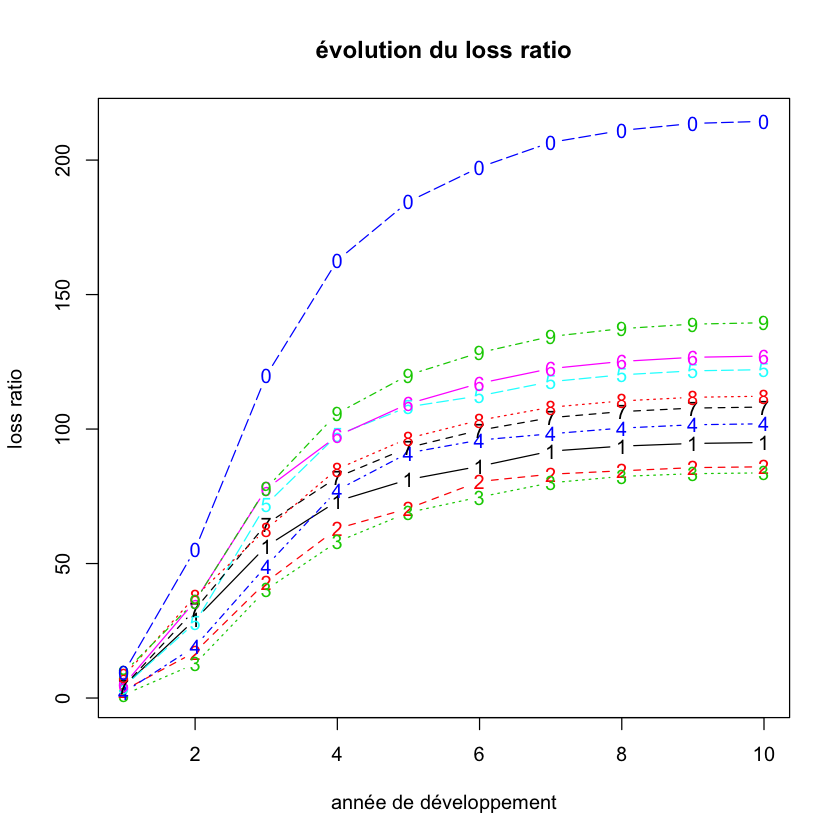

In [139]:
seq=seq(n)
matplot(seq,aperm(ratio_ultime_CL),type = "b",
xlab = "année de développement", ylab = "loss ratio",
main = "évolution du loss ratio")

In [140]:
#Analyse_cad_ouvertures = t(data.frame(Factor ,Moyenne,Ecartype,Coef_Variation,Minimum,Maximun))

In [142]:
BF(tri_reglements.cum_chLadder,Premium, ratios )

$provision
[1] 3882241101

$part
 [1] 1.00000000 0.99638882 0.98432948 0.96340577 0.92032836 0.86074712
 [7] 0.75891107 0.55906513 0.25764926 0.04452542

$ultime_priori
 [1] 2530806745 2373329862 2374254865 2943652453 3501730213 3547002055
 [7] 2767678982 2199356550 1310609983  361980495

$ultime
 [1]  25308068  32303821  60948367 137157229 314005884 529400279 694933565
 [8] 991766553 986038395 349482964

$vecteur_prov
 [1]         0   8570522  37205818 107720704 278988581 493930258 667256775
 [8] 969772987 972932295 345863159

In [143]:
#$part =le PC
#§provision total des PSAP
#$ultime_priori = 

In [144]:
ferguson = BF(tri_reglements.cum_chLadder,Premium, ratios )

In [145]:
pc=unlist(ferguson[2],use.names=F)

In [159]:
pc*100

[1] 100.000000  99.638882  98.432948  96.340577  92.032836  86.074712
 [7]  75.891107  55.906513  25.764926   4.452542

- Les valeurs pc représentent la proportion des charges ultimes au cours des années de développement .

In [147]:
pc_1=c()
prime_acquises=c(primes(tri_reglements.cum_chLadder))
loss_ratio_estime=c(ratios)

for(i in 1:11)
{
    pc_1[i-1]=c((1-pc[i-1])*100)
    
}

In [148]:
pc_1

[1]  0.000000  0.361118  1.567052  3.659423  7.967164 13.925288 24.108893
 [8] 44.093487 74.235074 95.547458

- 1-pc sont utile pour calculer les provisions.

In [149]:
prime_acquises

[1] 26640072 27705674 28813901 29966457 31165116 32411720 33708189 35056517
 [9] 36458777 37917129

In [166]:
# calcul du PSAP:

$$ PSAP = (1 − pc) × P rimeacquises × LossratioEstimé $$

In [162]:
psap=c(unlist(ferguson[5],use.names=F))

In [163]:
psap

[1]         0   8570522  37205818 107720704 278988581 493930258 667256775
 [8] 969772987 972932295 345863159

In [150]:
Reg <- sprintf("%s", c("2005","2006","2007","2008","2009","2010","2011","2012", "2013", "2014")) 
pc_1=(pc_1)
prime_acquises=(prime_acquises)
loss_ratio_estime=(loss_ratio_estime)
psap=(psap)

In [167]:
LS_tab = data.frame(Reg,
                pc_1, prime_acquises, loss_ratio_estime, psap)

In [168]:
LS_tab

Reg,pc_1,prime_acquises,loss_ratio_estime,psap
2005,0.000000,26640072,95.000000,0
2006,0.361118,27705674,85.662232,8570522
2007,1.567052,28813901,82.399633,37205818
2008,3.659423,29966457,98.231581,107720704
2009,7.967164,31165116,112.360574,278988581
2010,13.925288,32411720,109.435786,493930258
2011,24.108893,33708189,82.107021,667256775
2012,44.093487,35056517,62.737454,969772987
2013,74.235074,36458777,35.947722,972932295
2014,95.547458,37917129,9.546622,345863159


- On constate des valeurs S/P supérieurs à 100% pour les années des 2009, 2010 qui représentent des valeurs bizarres de Loss ratio.
l’assurance dans ces années n’a pas pu arriver à couvrir ses charges probablement à cause de retard de règlements sinistres ou d’augmentation de nombre de sinistres ou de la survenance de gros sinistre et des sinistres non estimées.

---

<h2><font color ="olive"> REFERENCE :</font></h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    - ChainLadder-0.2.11 Package Vignette <br>
    - Les cours du module Actuariat non-vie
 </div>

Link : </br>
**[ChainLadder-0.2.11 Package Vignette](https://cran.r-project.org/web/packages/ChainLadder/vignettes/ChainLadder.pdf)**

---

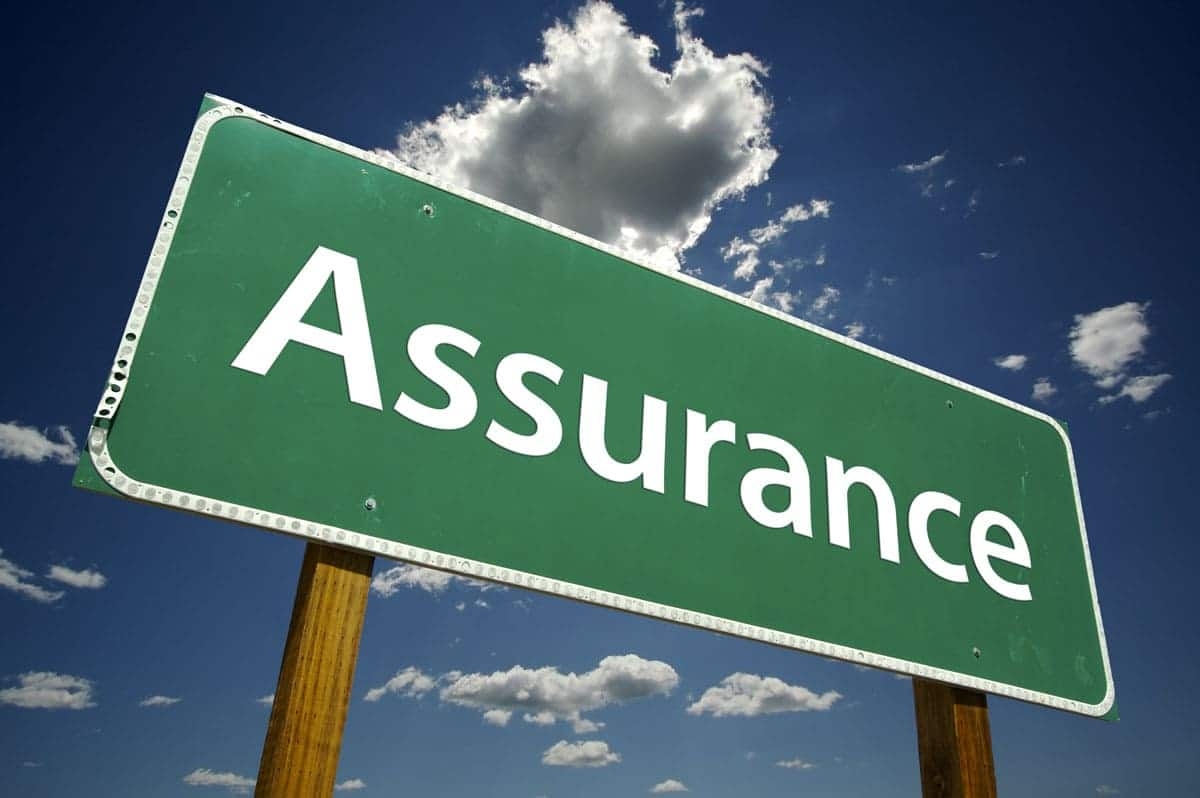